<a href="https://colab.research.google.com/github/kaushikrahul1993/Capital-Markets-Domain/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series

In [ ]:
os.chdir(r"/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/Capital Markets Domain")
sys.path.append(os.getcwd())

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.width', 1000)

In [ ]:
df=pd.read_csv('TATAMOTORS.NS.csv')
df.head()

Date        Open        High         Low       Close   Adj Close     Volume
0  2015-01-01  489.252289  494.149750  487.026154  493.160370  489.917236   944551.0
1  2015-01-02  491.973083  511.909271  491.973083  506.368683  503.038696  4193093.0
2  2015-01-05  504.686737  520.417969  501.322815  518.241333  514.833252  6758676.0
3  2015-01-06  508.891632  508.891632  493.951874  496.079071  492.816742  7979598.0
4  2015-01-07  489.746979  495.089661  484.008514  488.609192  485.395966  9232656.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2360 non-null   object 
 1   Open       2359 non-null   float64
 2   High       2359 non-null   float64
 3   Low        2359 non-null   float64
 4   Close      2359 non-null   float64
 5   Adj Close  2359 non-null   float64
 6   Volume     2359 non-null   float64
dtypes: float64(6), object(1)
memory usage: 129.2+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2360 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 129.2 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
df[((df.isnull())).any(axis=1)]

Date  Open  High  Low  Close  Adj Close  Volume
40 2015-02-28   NaN   NaN  NaN    NaN        NaN     NaN

In [ ]:
df.dropna(inplace=True)

In [ ]:
df["Date"].max()-df["Date"].min()

Timedelta('3493 days 00:00:00')

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.describe()

Open         High          Low        Close    Adj Close        Volume
count  2359.000000  2359.000000  2359.000000  2359.000000  2359.000000  2.359000e+03
mean    396.935476   402.071841   390.850512   396.191792   394.019840  2.379846e+07
std     202.390842   203.981276   200.188434   202.152701   201.610486  3.053952e+07
min      66.500000    66.900002    63.500000    65.300003    64.896851  9.445510e+05
25%     258.250000   261.700012   252.525002   258.100006   256.506515  7.342951e+06
50%     404.549988   409.899994   398.149994   403.649994   401.157928  1.242660e+07
75%     481.774994   487.725006   474.674988   481.399994   478.405532  2.733780e+07
max    1038.000000  1094.000000  1030.400024  1090.949951  1090.949951  3.905778e+08

In [ ]:
df.head()

Open        High         Low       Close   Adj Close     Volume
Date                                                                             
2015-01-01  489.252289  494.149750  487.026154  493.160370  489.917236   944551.0
2015-01-02  491.973083  511.909271  491.973083  506.368683  503.038696  4193093.0
2015-01-05  504.686737  520.417969  501.322815  518.241333  514.833252  6758676.0
2015-01-06  508.891632  508.891632  493.951874  496.079071  492.816742  7979598.0
2015-01-07  489.746979  495.089661  484.008514  488.609192  485.395966  9232656.0

In [ ]:
df.shape

(2359, 6)

In [ ]:
df_resampled=df.resample('W').mean()
df_resampled=df_resampled[(df_resampled!=0).all(axis=1)]
df_resampled.sample(n=5)

Open        High         Low       Close   Adj Close      Volume
Date                                                                              
2016-09-25  555.419995  558.110010  548.300000  552.860010  549.446704   6125125.6
2022-08-21  485.312500  490.174996  477.437508  482.762497  479.781983  15363174.5
2016-03-06  318.370001  327.459998  313.170001  322.470007  320.349377  11501390.4
2021-05-30  317.219995  320.550000  314.379999  315.990002  314.039118  34817779.6
2016-07-24  495.620001  503.880005  491.820007  496.809998  493.742749   6014777.6

In [ ]:
df_resampled.describe()

Open         High          Low        Close    Adj Close        Volume
count   500.000000   500.000000   500.000000   500.000000   500.000000  5.000000e+02
mean    397.946937   403.128315   391.862469   397.242407   395.070483  2.378982e+07
std     203.914678   205.555211   201.696498   203.696650   203.158244  2.733851e+07
min      68.216667    70.012501    66.880000    68.112501    67.691982  2.568822e+06
25%     258.291252   262.412500   255.050002   258.707499   257.110268  8.000100e+06
50%     406.902499   410.950000   399.644998   405.370001   402.867288  1.273850e+07
75%     482.828125   490.358746   477.139374   483.231873   480.248459  2.781462e+07
max    1023.449997  1036.225006  1008.125000  1030.899979  1030.899979  2.230025e+08

In [ ]:
main_col=df_resampled.columns
main_col

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Total plots: 6
Max rows: 3, Max columns: 2


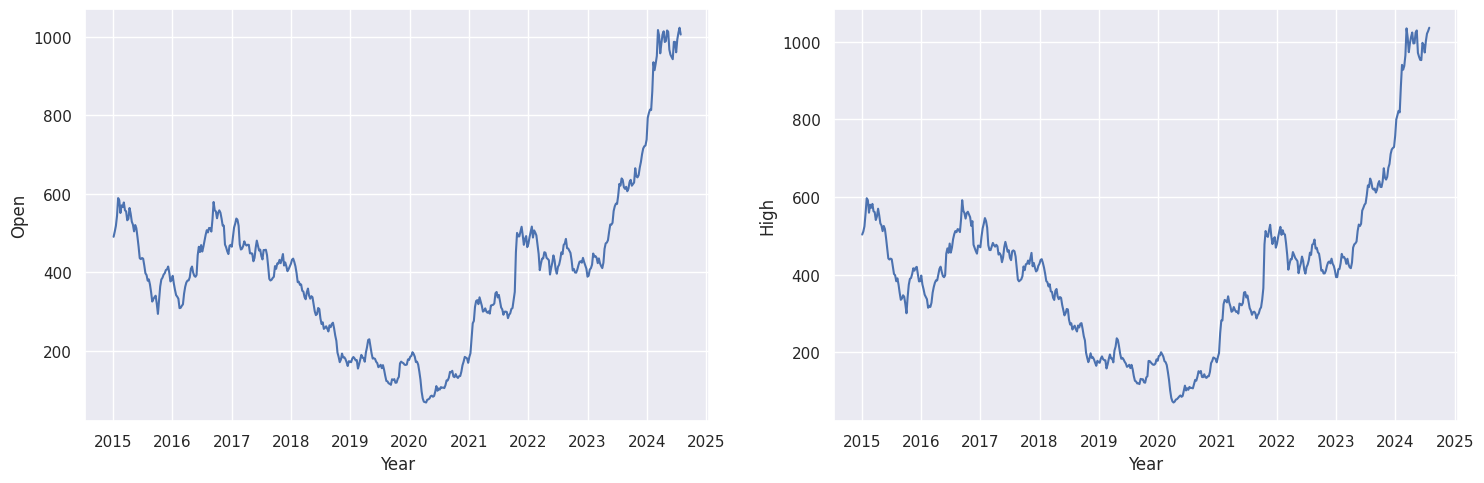

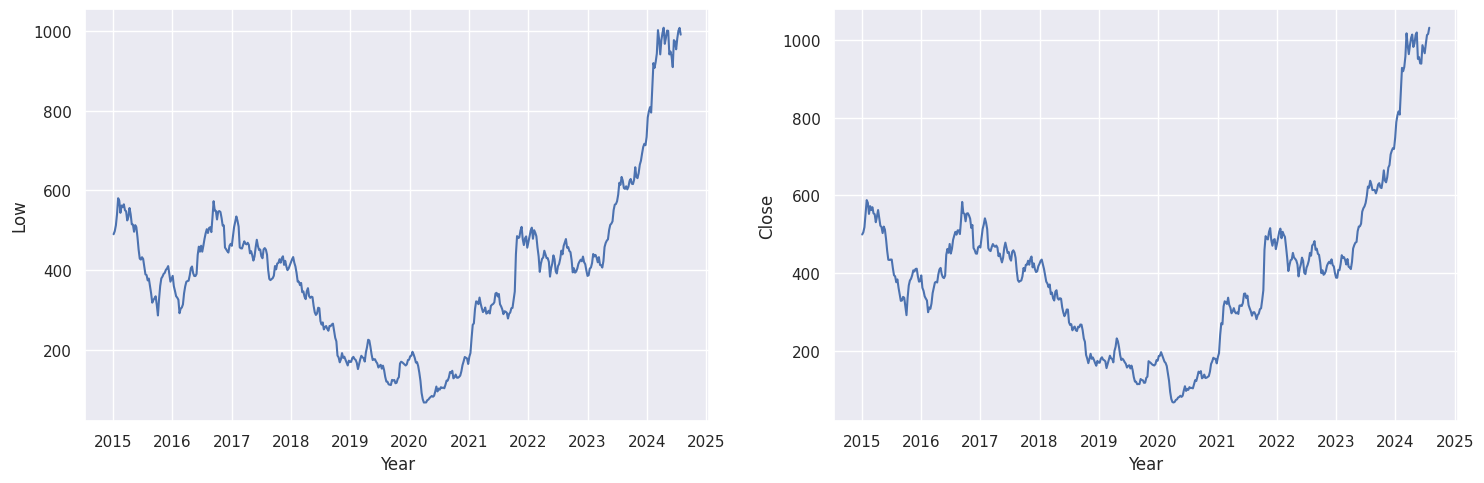

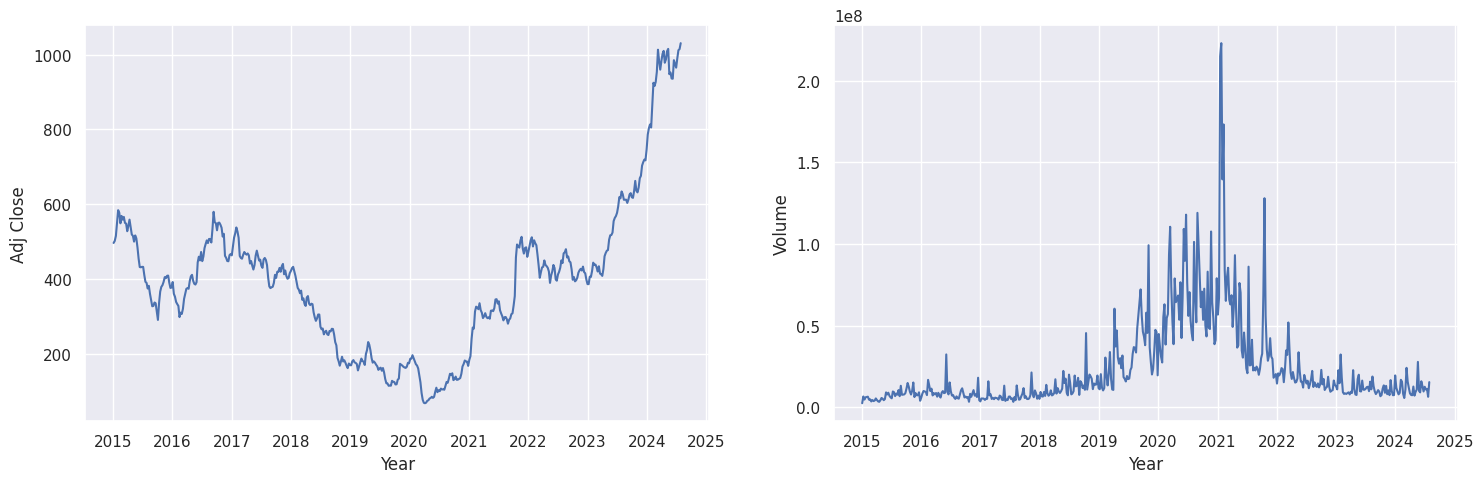

In [ ]:
total_plots=len(df_resampled.columns)
print(f"Total plots: {total_plots}")
col_div=2
max_rows=math.ceil(total_plots/col_div)
print(f"Max rows: {max_rows}, Max columns: {col_div}")
row=1
j=0
while row<=max_rows:
  plt.subplots(1,col_div,figsize=(15,5))
  col_plot=df_resampled.columns[j:j+col_div]
  for i in range(len(col_plot)):
    plt.subplot(1,col_div,i+1)
    sns.lineplot(data=df_resampled,y=col_plot[i],x =df_resampled.index)
    plt.xlabel("Year")
    plt.grid(visible= True , which=  'both', axis = "both")
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1, wspace=0.2)
  j=j+col_div
  row=row+1
plt.show()

In [ ]:
def box_plot_num(col,num_col_list, df):
    col_cnt=len(num_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.subplots(1,div,figsize=(10,5))
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.2)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.subplots(1,div,figsize=(10,10))
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.2)
            j=j+div
            row=row+1
        plt.subplots(1,(col_cnt-j),figsize=(10,10))
        col_plot=num_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.boxplot(df[col_plot[i]],palette='bright')
            plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.2)
        plt.show()

rows=3, Col:2, Total:6


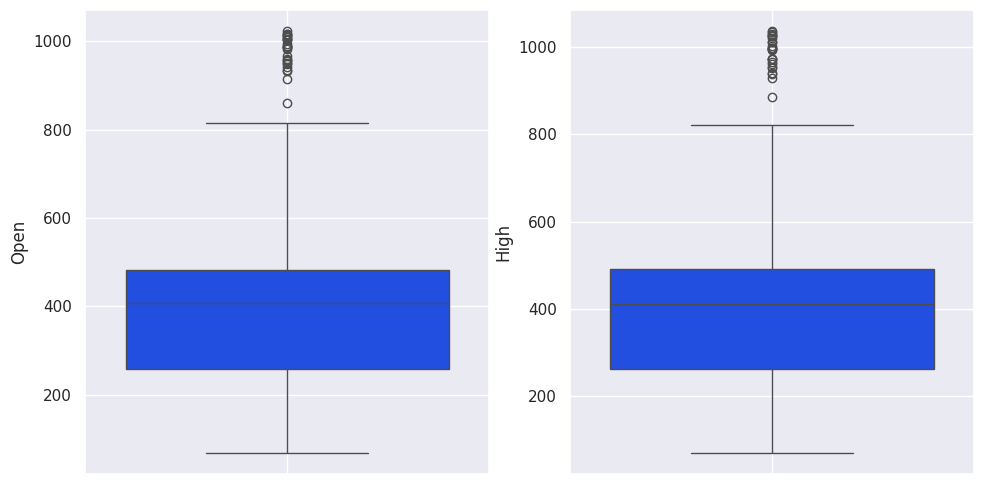

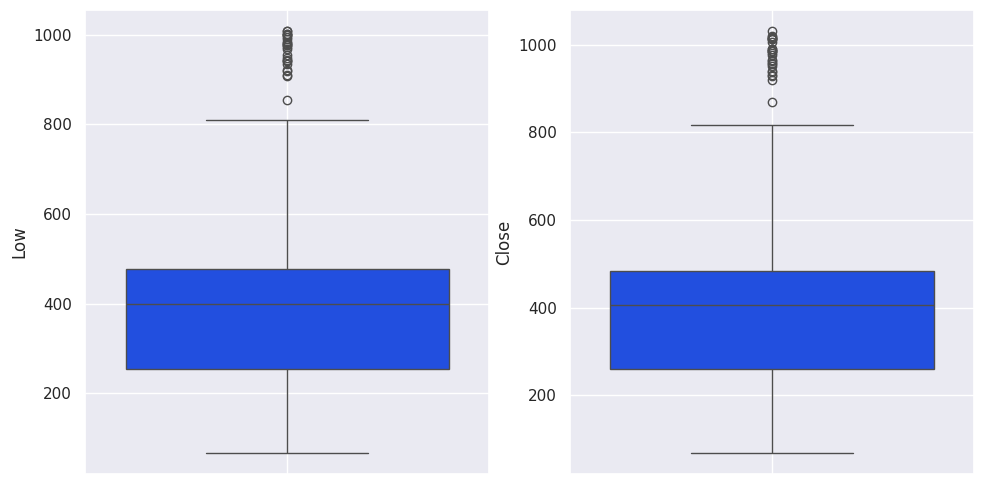

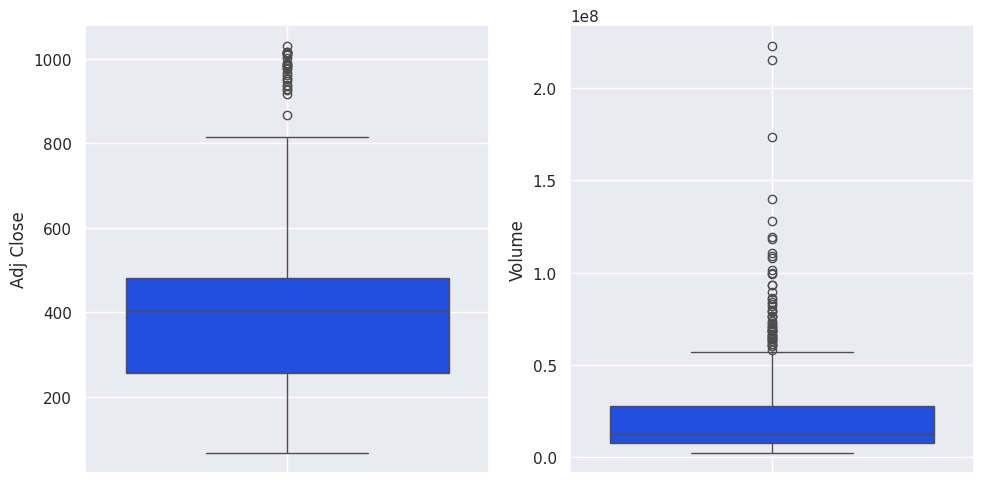

In [ ]:
box_plot_num(col=2,num_col_list=df_resampled.columns,df=df_resampled)

In [ ]:
def box_plot_year(col,num_col_list, df):
    col_cnt=len(num_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.subplots(1,div,figsize=(10,3))
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(x=df.index.year,y=df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.2)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.subplots(1,div,figsize=(10,3))
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(x=df.index.year,y=df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.2)
            j=j+div
            row=row+1
        plt.subplots(1,(col_cnt-j),figsize=(10,3))
        col_plot=num_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.boxplot(x=df.index.year,y=df[col_plot[i]],palette='bright')
            plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.2)
        plt.show()

rows=6, Col:1, Total:6


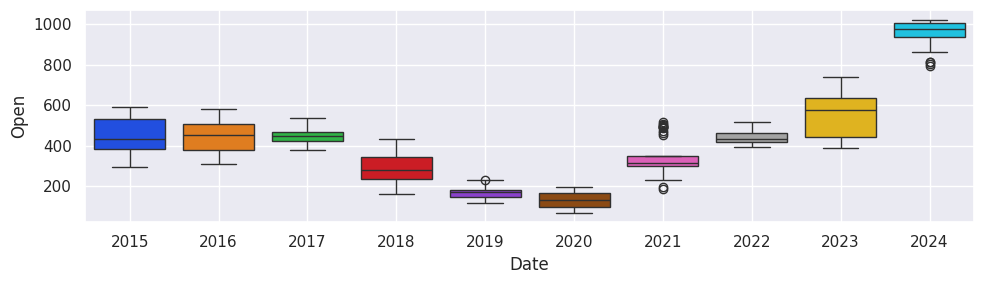

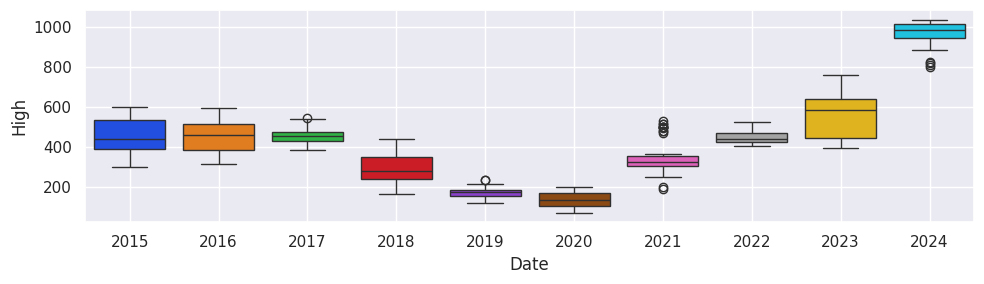

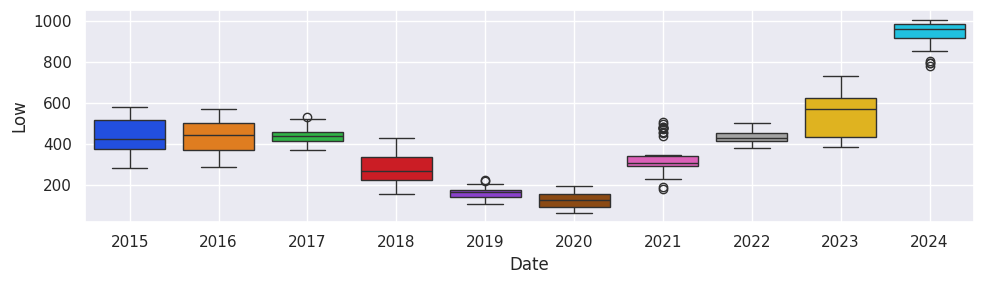

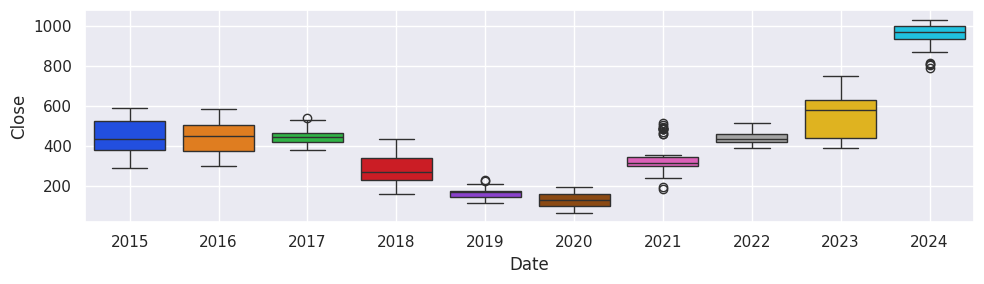

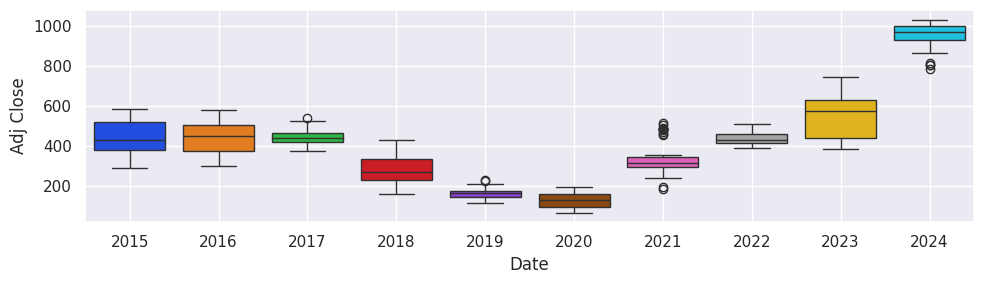

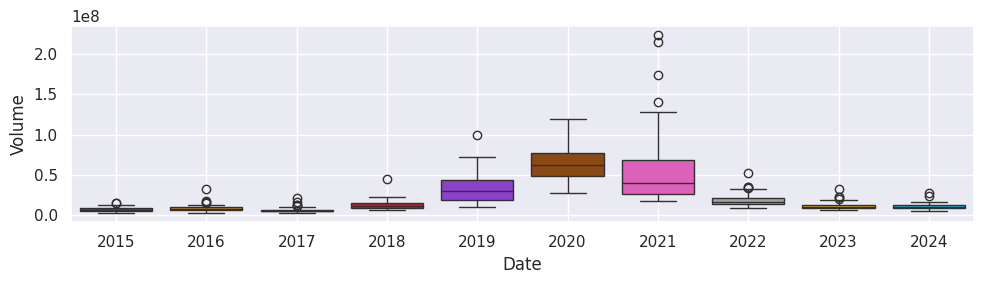

In [ ]:
box_plot_year(col=1,num_col_list=df_resampled.columns,df=df_resampled)

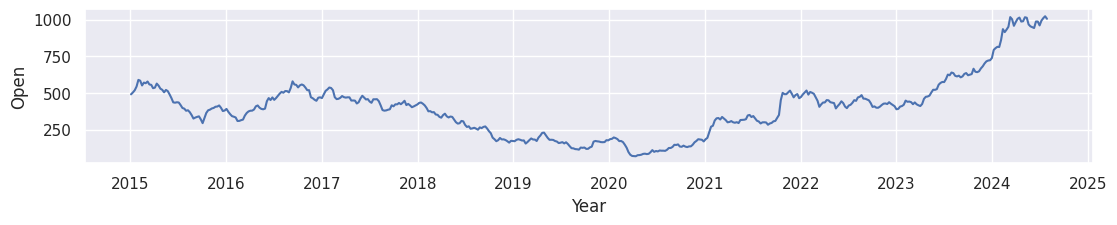

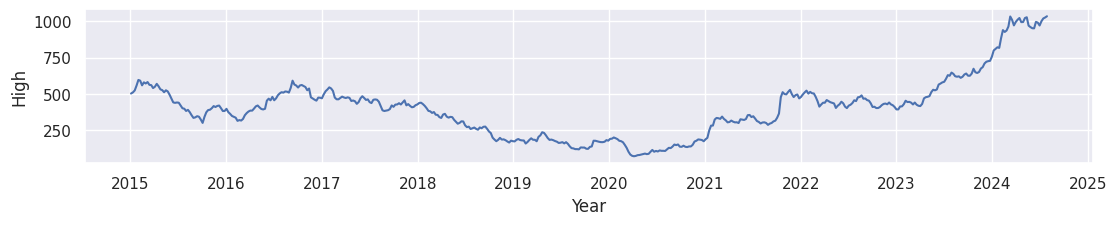

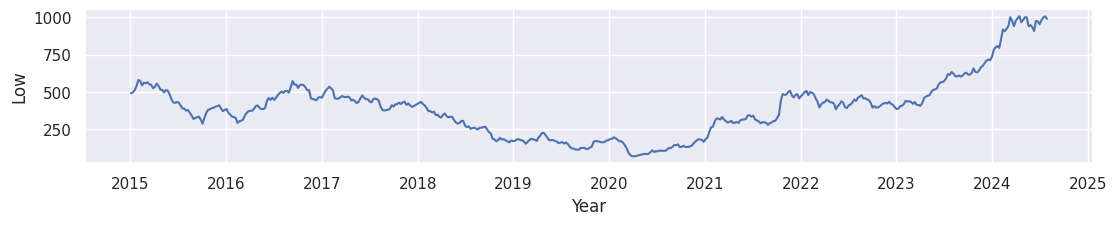

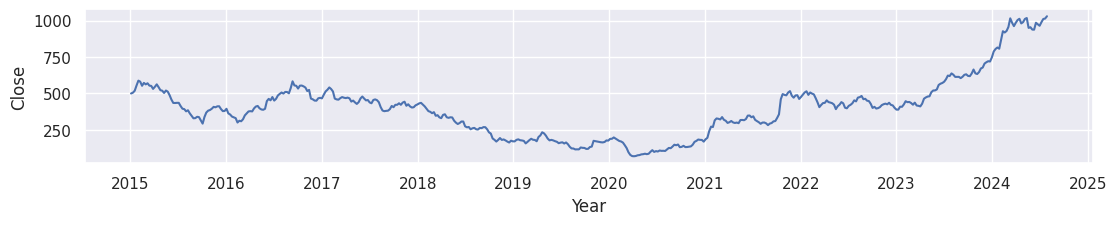

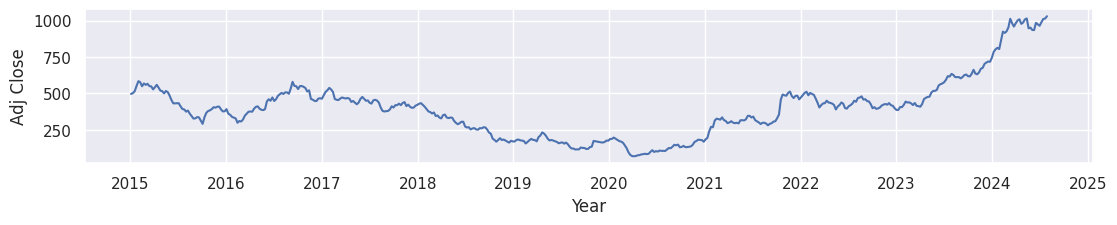

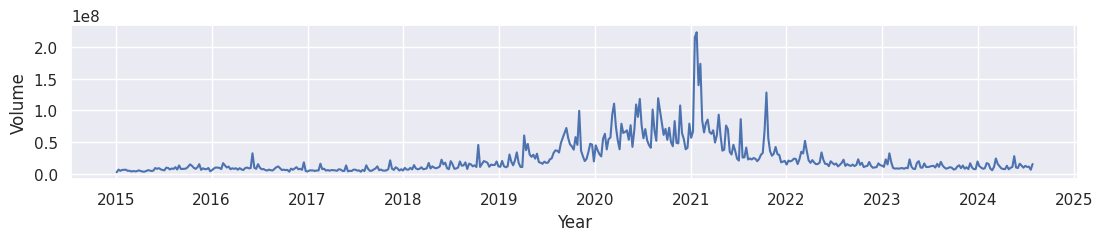

In [ ]:
for col in df_resampled.columns:
  plt.figure(figsize=(13,2))
  sns.lineplot(data=df_resampled,y=col,x =df_resampled.index)
  plt.xlabel("Year")

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.0 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

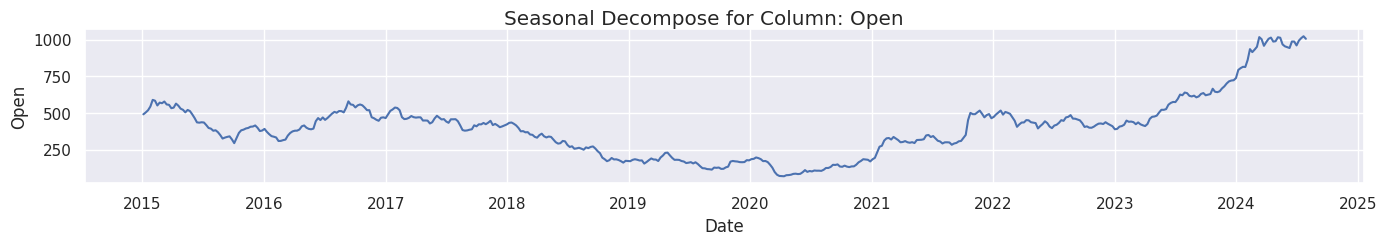

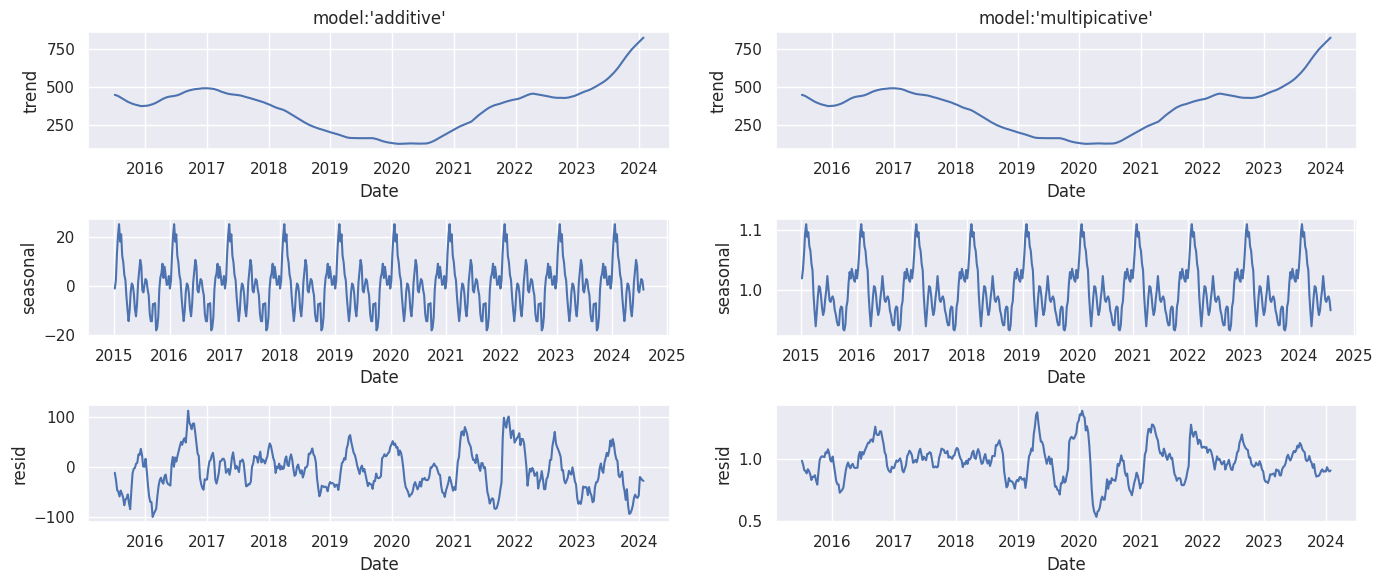

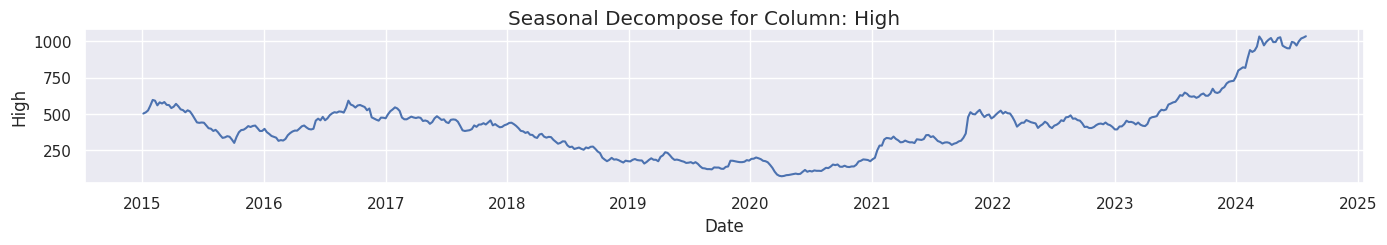

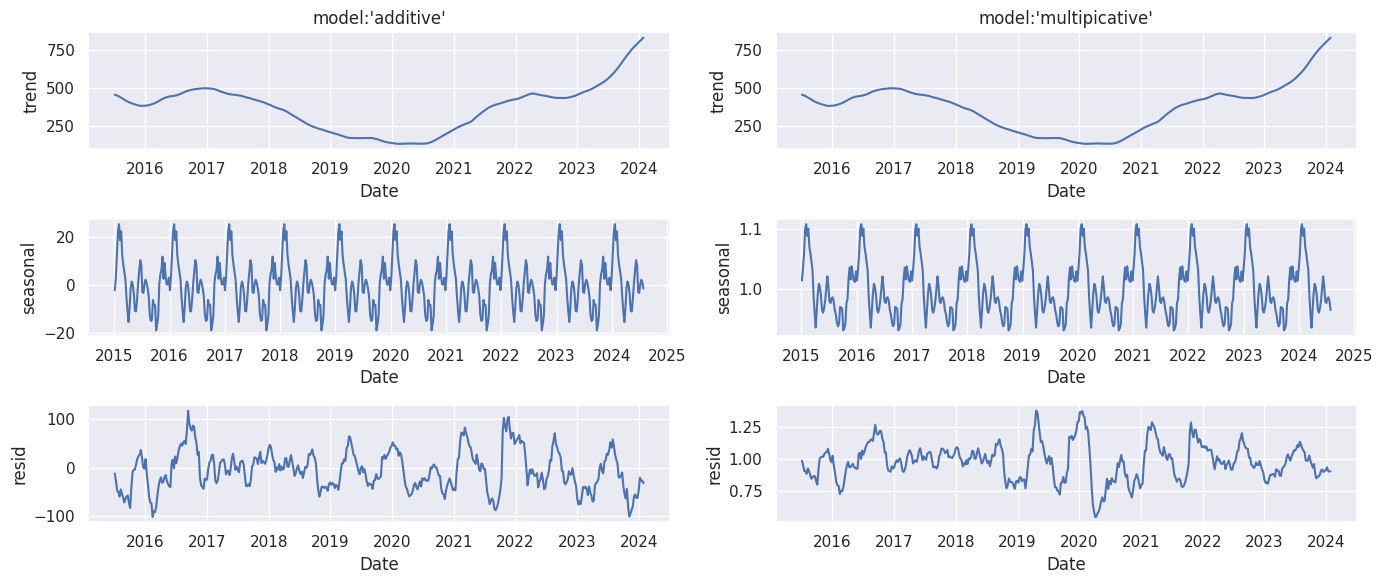

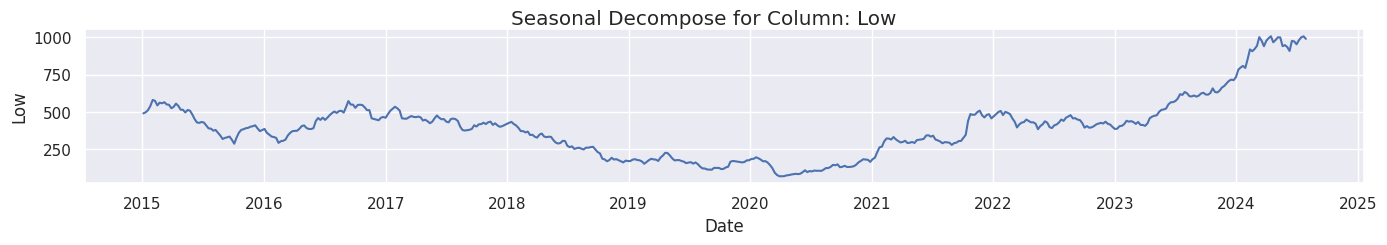

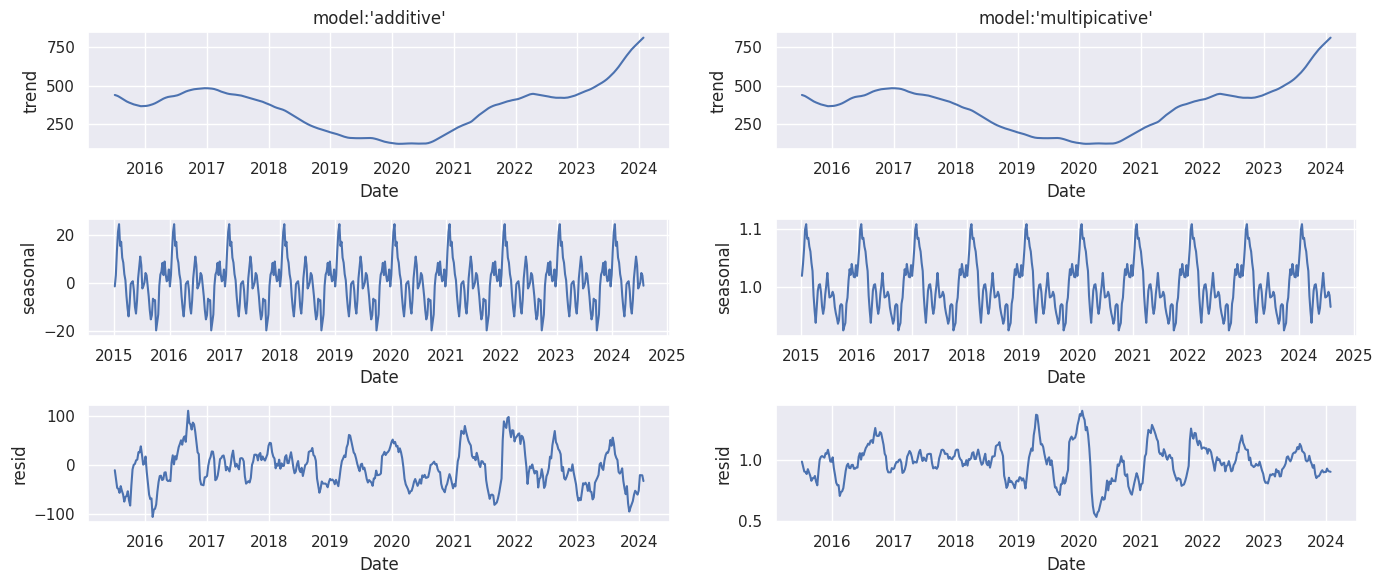

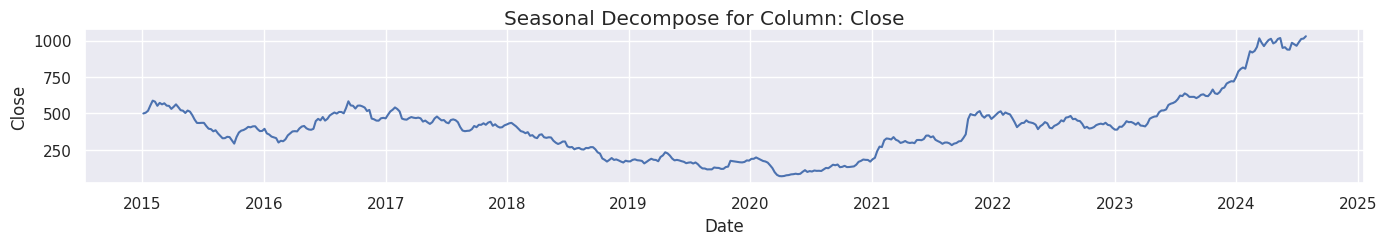

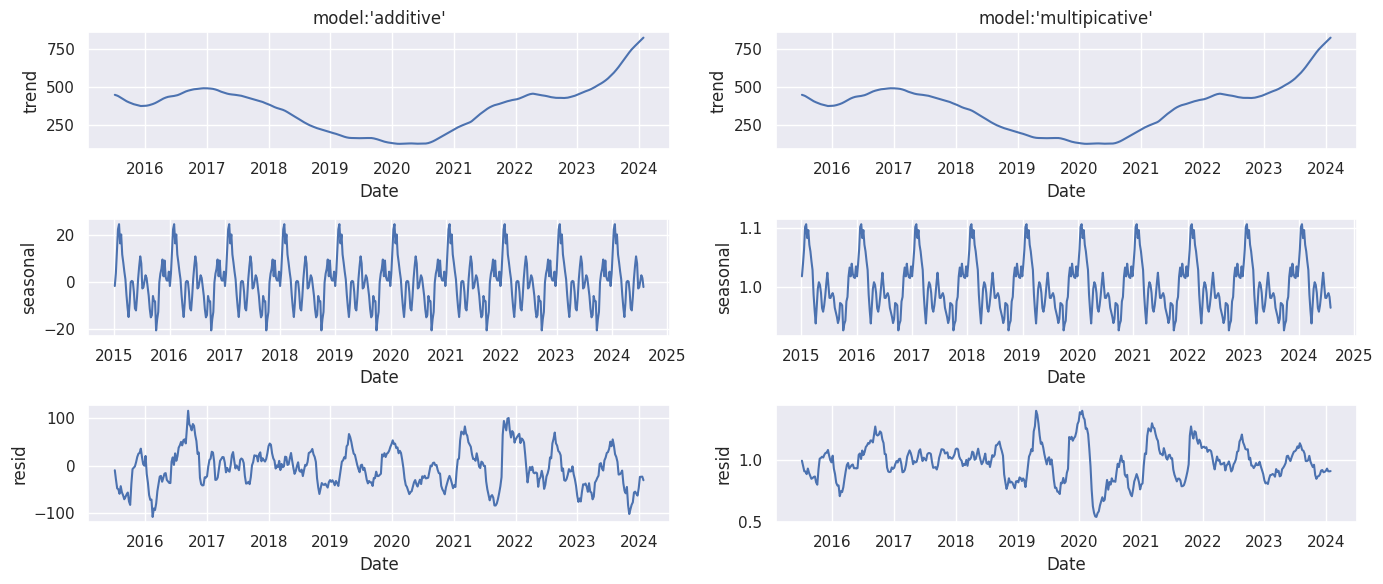

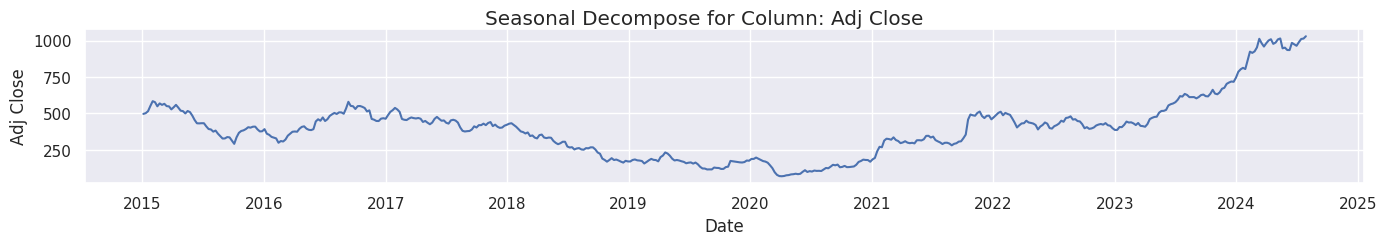

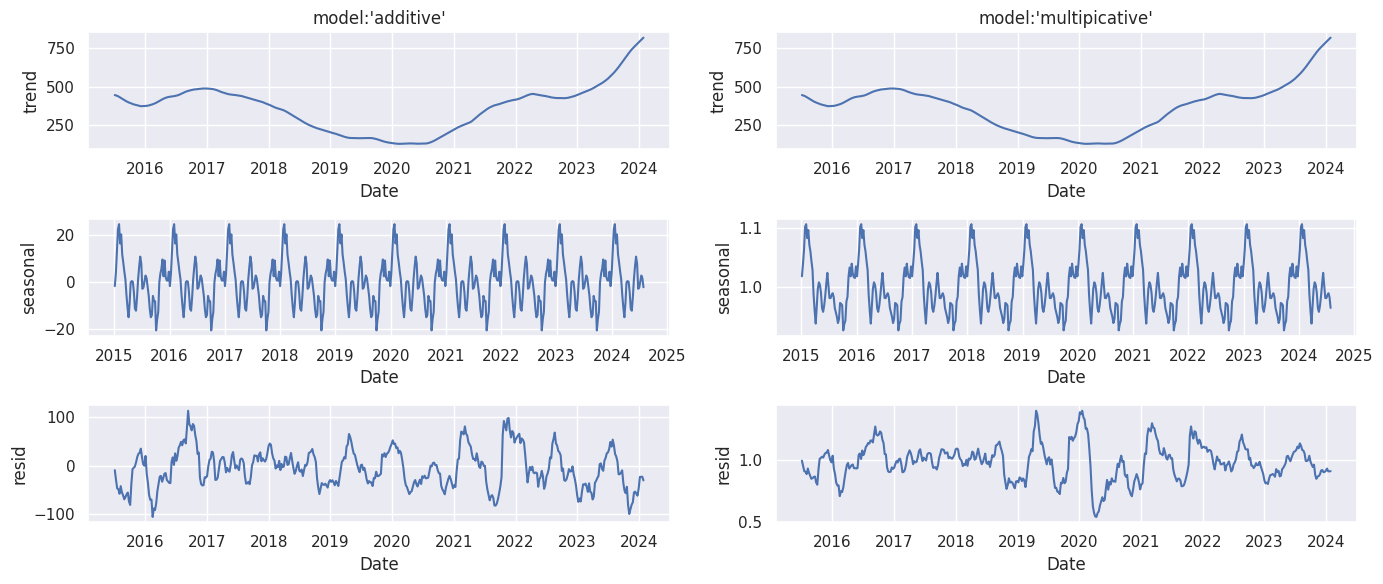

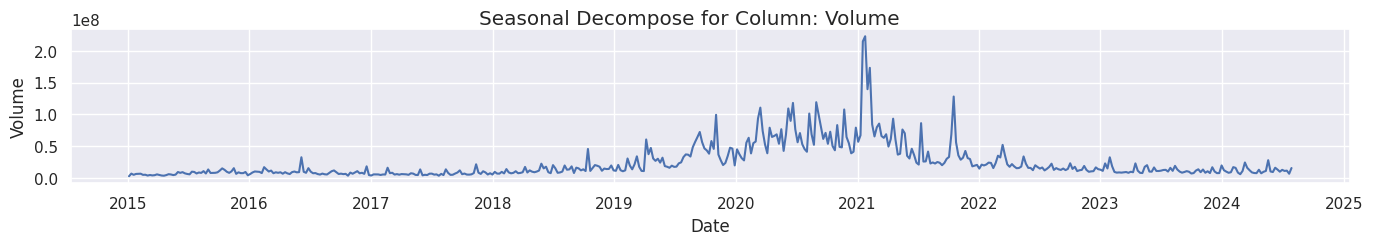

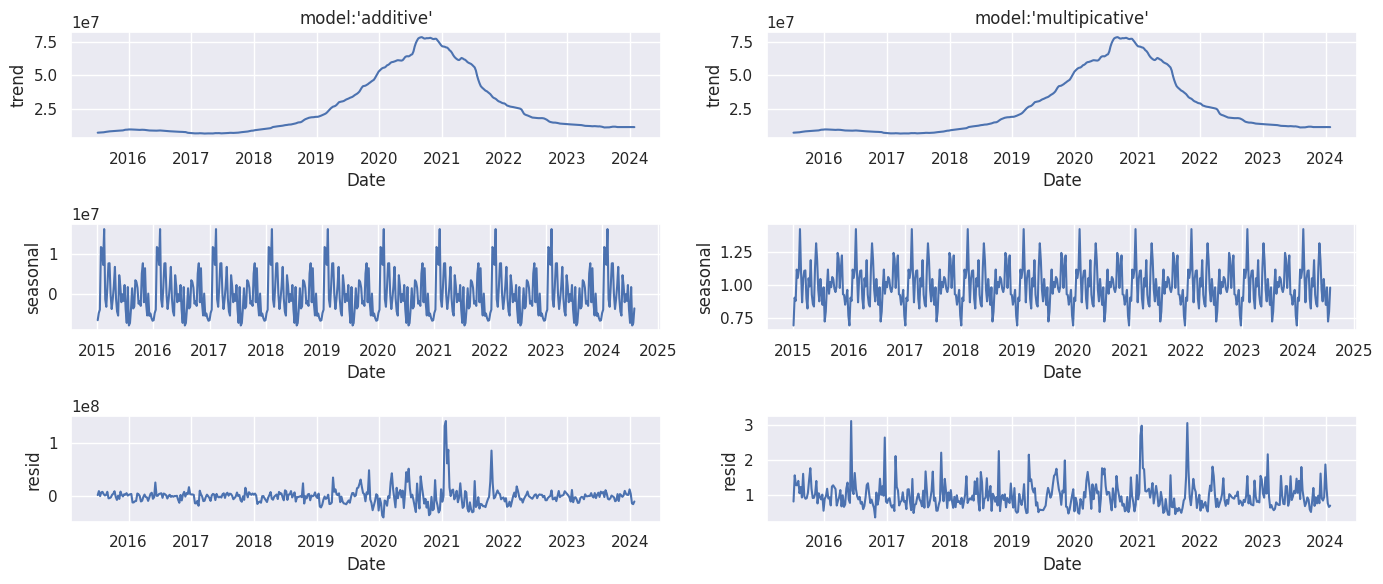

In [ ]:
for col in df_resampled.columns:
  result_additive=seasonal_decompose(df_resampled[col], model='additive')
  result_multipicative=seasonal_decompose(df_resampled[col], model='multipicative')
  plt.figure(figsize=(16.5,2))
  plt.suptitle(f"Seasonal Decompose for Column: {col}")
  sns.lineplot(df_resampled[col])
  plt.subplots(3,2, figsize=(14,6))
  plt.subplot(3,2,1)
  plt.title("model:'additive'")
  sns.lineplot(result_additive.trend)
  plt.subplot(3,2,3)
  sns.lineplot(result_additive.seasonal)
  plt.subplot(3,2,5)
  sns.lineplot(result_additive.resid)
  plt.subplot(3,2,2)
  plt.title("model:'multipicative'")
  sns.lineplot(result_multipicative.trend)
  plt.subplot(3,2,4)
  sns.lineplot(result_multipicative.seasonal)
  plt.subplot(3,2,6)
  sns.lineplot(result_multipicative.resid)
  plt.grid(visible= True, which='both', axis = "both",)
  plt.tight_layout()
  plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
adfuller_add_dict={}
adfuller_multi_dict={}
for col in main_col:
  result_additive=seasonal_decompose(df_resampled[col], model='additive')
  result_multipicative=seasonal_decompose(df_resampled[col], model='multipicative')
  adfuller_add= adfuller(result_additive.resid.dropna())
  adfuller_multi= adfuller(result_multipicative.resid.dropna())
  if adfuller_add[1]<0.05:
    adfuller_add_dict[col]=np.round((adfuller_add[1]),3), "Stationary Data"
  else:
    adfuller_add_dict[col]=np.round((adfuller_add[1]),3), "Non-Stationary Data"

  if adfuller_multi[1]<0.05:
    adfuller_multi_dict[col]=np.round((adfuller_multi[1]),3),"Stationary Data"
  else:
    adfuller_multi_dict[col]=np.round((adfuller_multi[1]),3),"Non-Stationary Data"
resi_adfuller_df=pd.DataFrame([adfuller_add_dict,adfuller_multi_dict],index=['Additive Model Seasonal Decompose','Multipicative Model Seasonal Decompose'])
resi_adfuller_df

Open                    High                     Low                   Close               Adj Close                  Volume
Additive Model Seasonal Decompose       (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)
Multipicative Model Seasonal Decompose  (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)  (0.0, Stationary Data)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
durbin_add_dict={}
durbin_multi_dict={}
for col in main_col:
  result_additive=seasonal_decompose(df_resampled[col], model='additive')
  result_multipicative=seasonal_decompose(df_resampled[col], model='multipicative')
  durbin_add= durbin_watson(result_additive.resid.dropna())
  durbin_multi= durbin_watson(result_multipicative.resid.dropna())
  if durbin_add<2 and durbin_add>1 :
    durbin_add_dict[col]=np.round((durbin_add),3), "Positive Weak Autocorrelation"
  elif durbin_add<1:
    durbin_add_dict[col]=np.round((durbin_add),3), "Positive Strong Autocorrelation"
  elif durbin_add>2 and durbin_add<3:
    durbin_add_dict[col]=np.round((durbin_add),3), "Negative Weak Autocorrelation"
  elif durbin_add>3:
    durbin_add_dict[col]=np.round((durbin_add),3), "Negative Strong Autocorrelation"
  else:
    durbin_add_dict[col]=np.round((durbin_add),3), "No Autocorrelation"

  if durbin_add<2 and durbin_add>1:
    durbin_multi_dict[col]=np.round((durbin_multi),3),"Positive Weak Autocorrelation"
  elif durbin_add<1:
    durbin_multi_dict[col]=np.round((durbin_multi),3),"Positive Strong Autocorrelation"
  elif durbin_multi>2 and durbin_multi<3:
    durbin_multi_dict[col]=np.round((durbin_multi),3),"Negative Weak Autocorrelation"
  elif durbin_multi>3:
    durbin_multi_dict[col]=np.round((durbin_multi),3),"Negative Strong Autocorrelation"
  else:
    durbin_multi_dict[col]=np.round((durbin_multi),3),"No Autocorrelation"
resi_durbin_df=pd.DataFrame([durbin_add_dict,durbin_multi_dict],index=['Additive Model Seasonal Decompose','Multipicative Model Seasonal Decompose'])
resi_durbin_df

Open                                      High                                       Low                                     Close                                 Adj Close                                    Volume
Additive Model Seasonal Decompose       (0.123, Positive Strong Autocorrelation)  (0.127, Positive Strong Autocorrelation)  (0.128, Positive Strong Autocorrelation)  (0.128, Positive Strong Autocorrelation)  (0.128, Positive Strong Autocorrelation)  (0.969, Positive Strong Autocorrelation)
Multipicative Model Seasonal Decompose  (0.002, Positive Strong Autocorrelation)  (0.002, Positive Strong Autocorrelation)  (0.002, Positive Strong Autocorrelation)  (0.002, Positive Strong Autocorrelation)  (0.002, Positive Strong Autocorrelation)  (0.194, Positive Strong Autocorrelation)

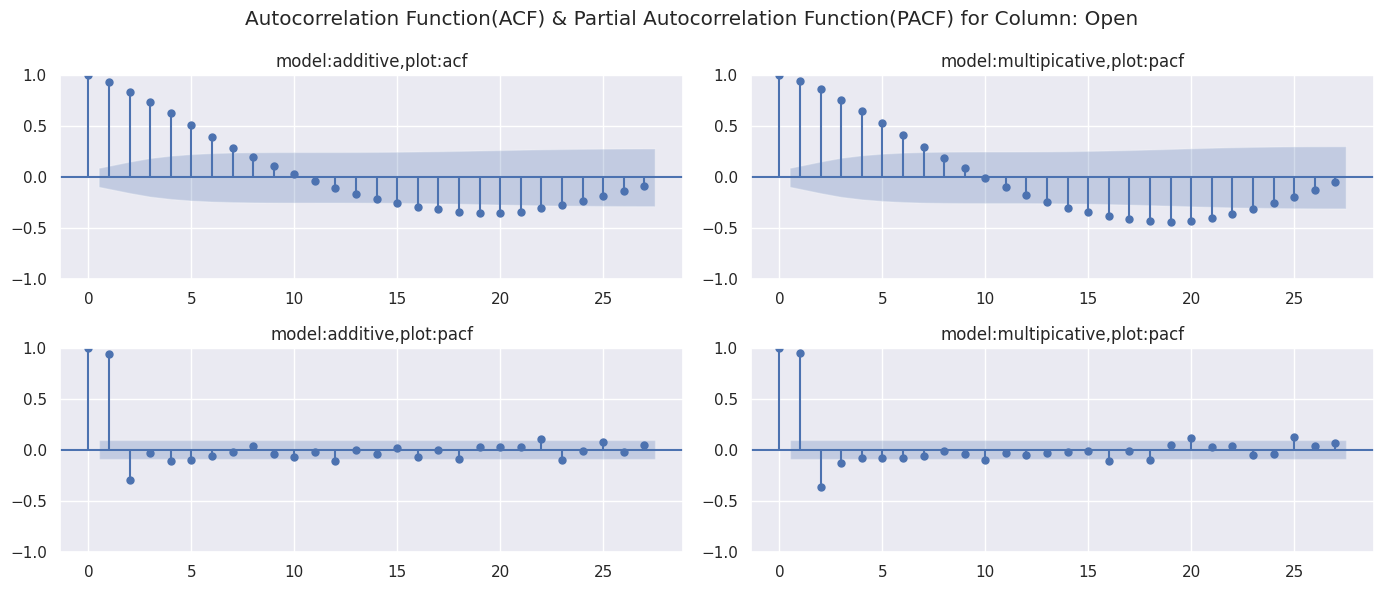

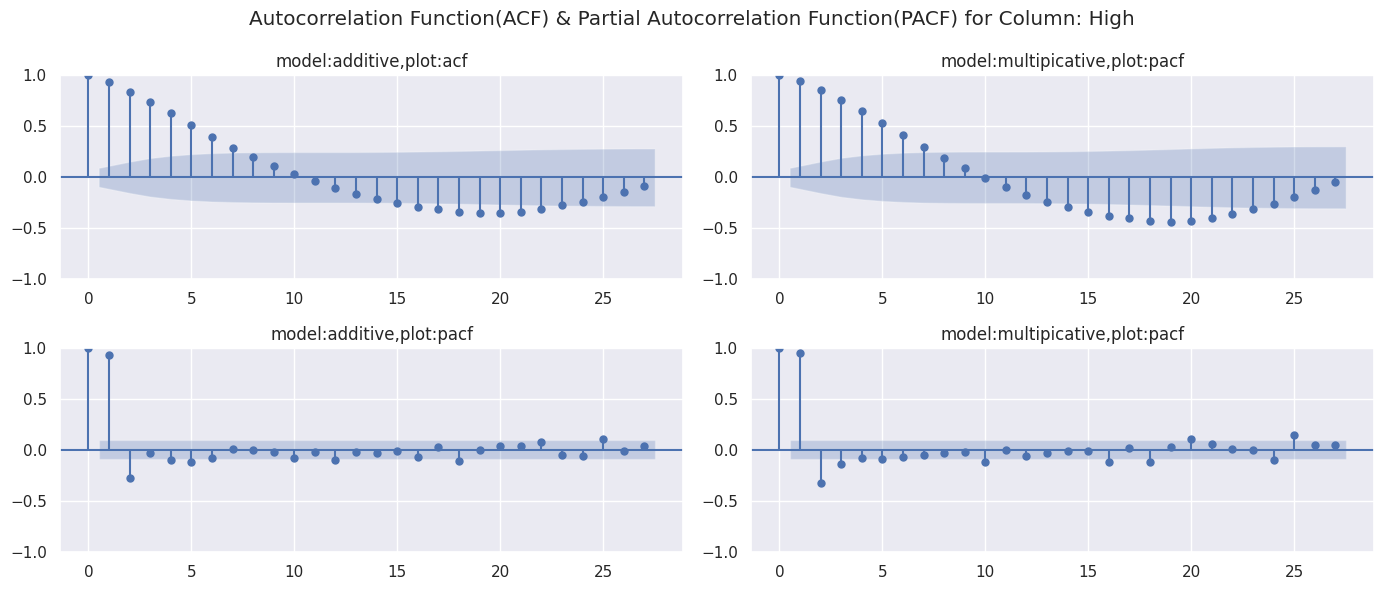

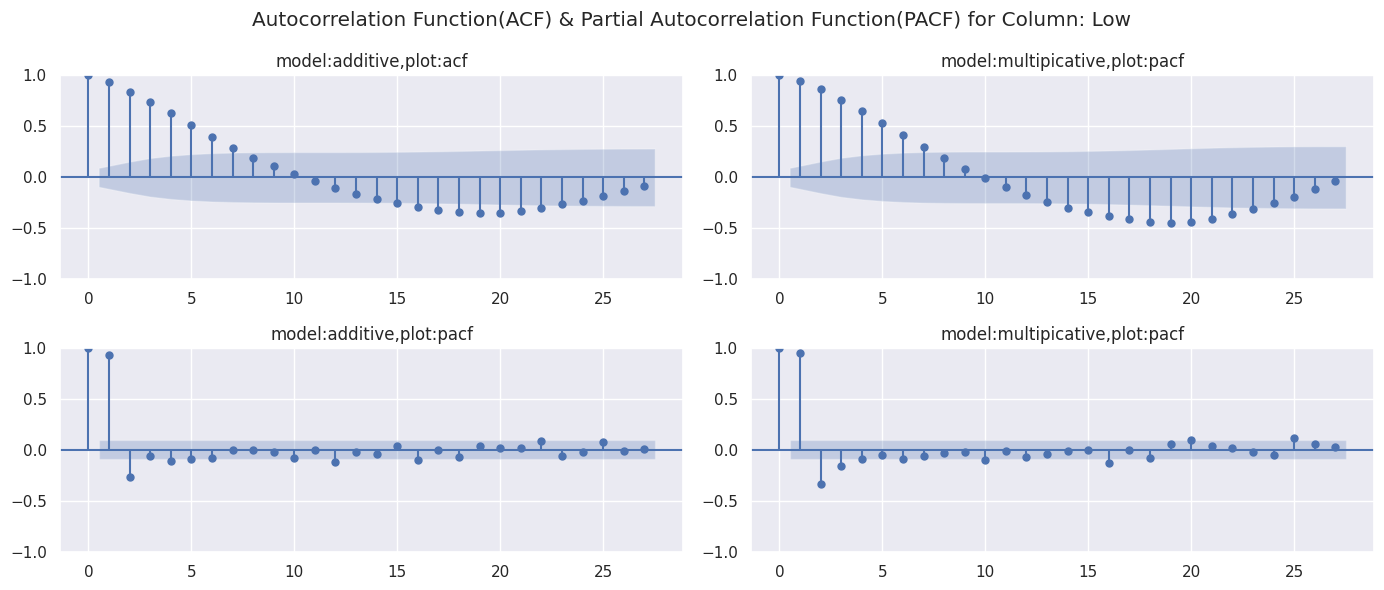

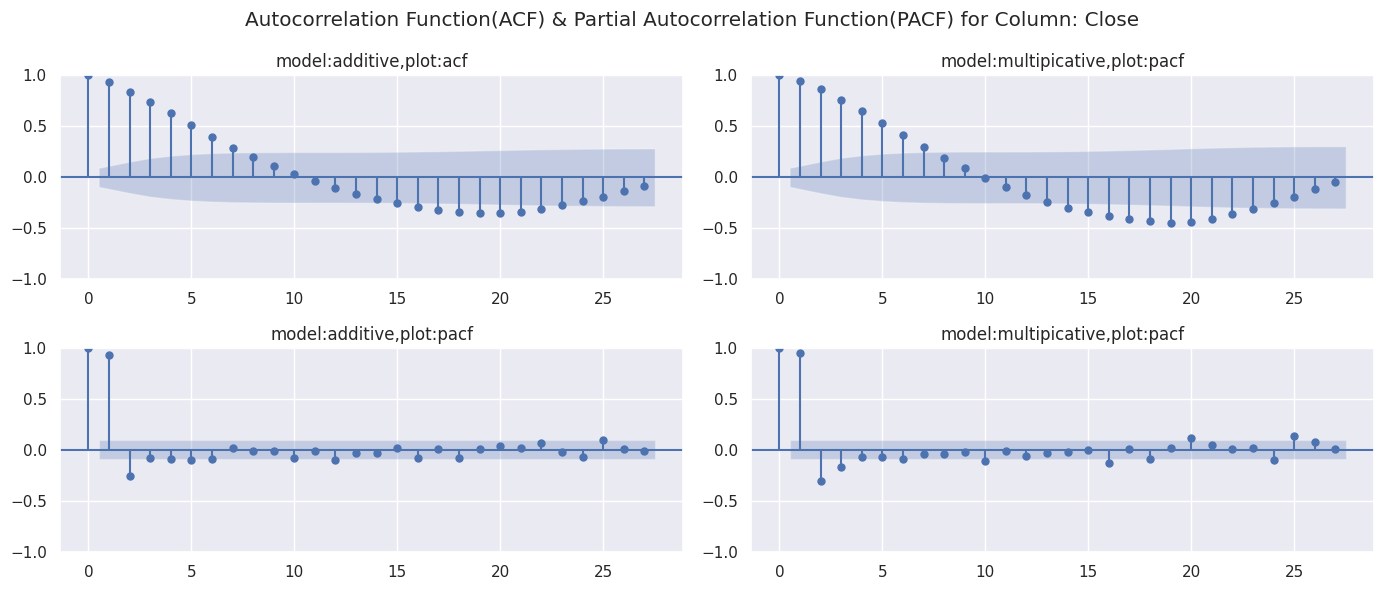

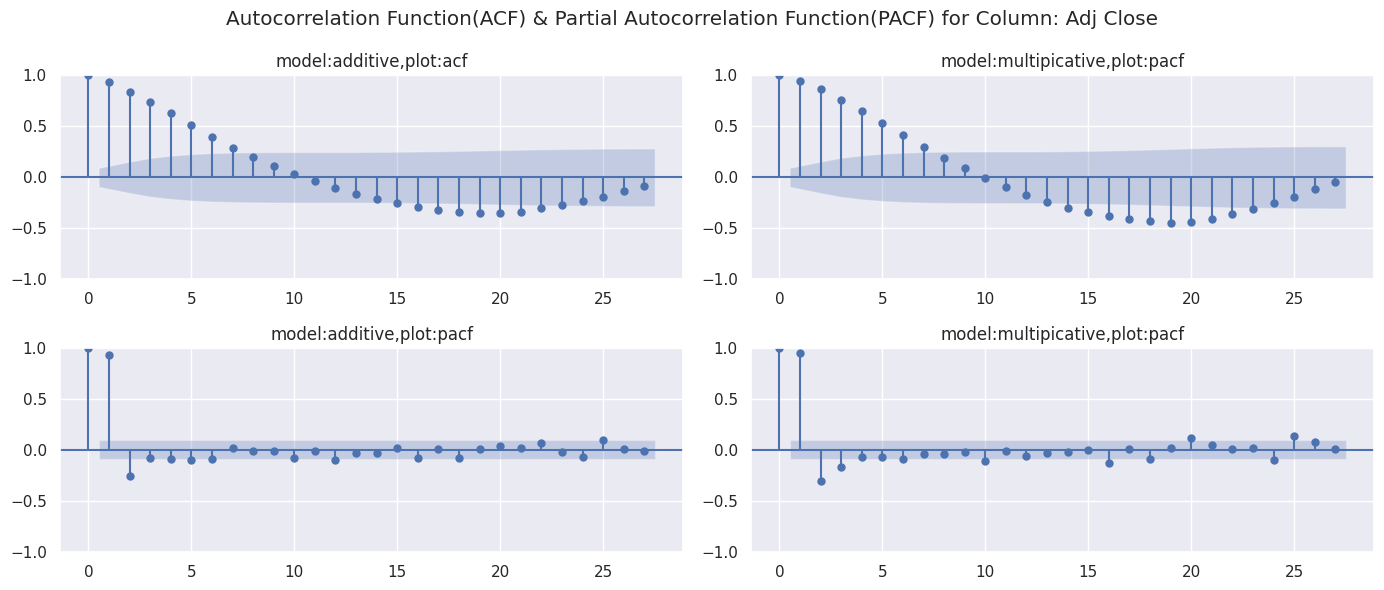

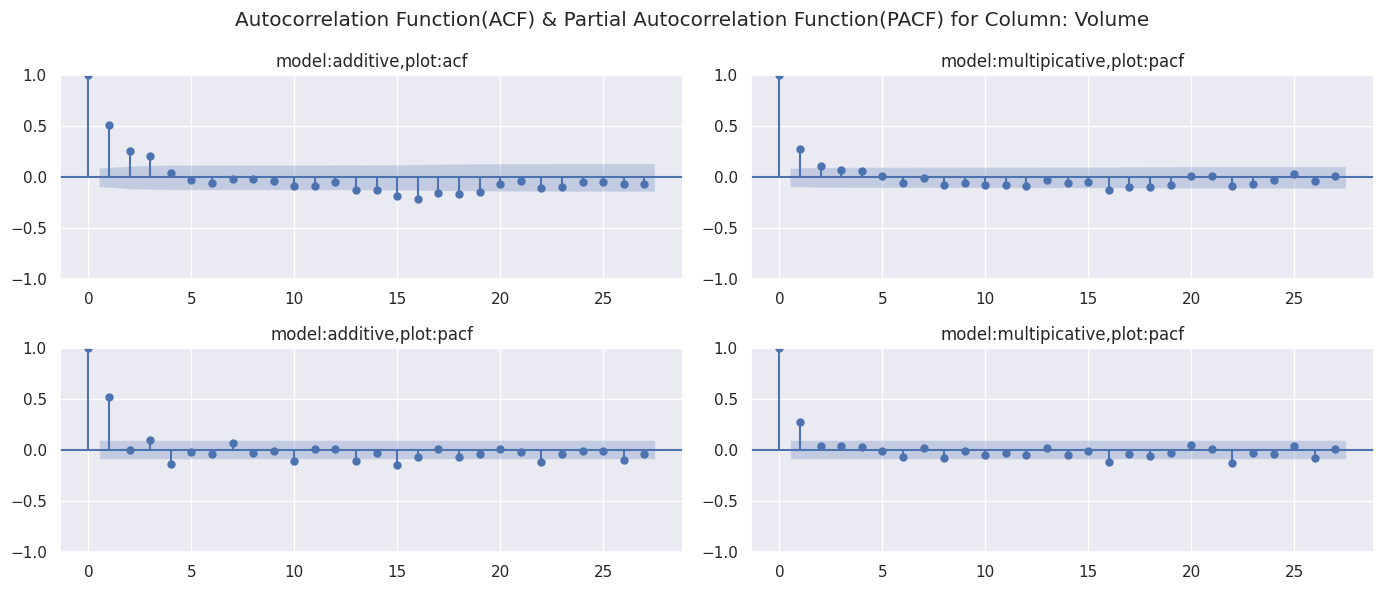

In [ ]:
for col in main_col:
  fig, axes = plt.subplots(2, 2, figsize=(14, 6))
  resid_add=seasonal_decompose(df_resampled[col], model='additive').resid.dropna()
  resid_mul=seasonal_decompose(df_resampled[col], model='multipicative').resid.dropna()

  plt.suptitle(f"Autocorrelation Function(ACF) & Partial Autocorrelation Function(PACF) for Column: {col}")

  plot_acf(resid_add, ax=axes[0,0])
  axes[0,0].set_title("model:additive,plot:acf")

  plot_acf(resid_mul, ax=axes[0,1])
  axes[0,1].set_title("model:multipicative,plot:pacf")

  plot_pacf(resid_add, ax=axes[1,0])
  axes[1,0].set_title("model:additive,plot:pacf")

  plot_pacf(resid_mul, ax=axes[1,1])
  axes[1,1].set_title("model:multipicative,plot:pacf")

  plt.tight_layout()
plt.show()

In [ ]:
def stationary_test(df):
  adfuller_p= adfuller(df.dropna())
  return adfuller_p[1]

In [ ]:
def stationarity_diff(df, diff=0):
  if stationary_test(df) <0.05:
    return "Data is Stationary after rolling difference and adfuller probalabity of",diff, stationary_test(df)
  else:
    df_diff=df.diff()
    diff=diff+1
    return stationarity_diff(df_diff.dropna(), diff)

In [ ]:
stationary_diff_df=pd.DataFrame(index=["Diff","adfuller_prob"])
for col in main_col:
  print(f"{col}:{stationarity_diff(df_resampled[col])}")
  stationary_diff_df[col]=[int(stationarity_diff(df_resampled[col])[1]),stationarity_diff(df_resampled[col])[2]]
stationary_diff_df

Open:('Data is Stationary after rolling difference and adfuller probalabity of', 1, 5.1349912526525865e-12)
High:('Data is Stationary after rolling difference and adfuller probalabity of', 1, 6.410588820840611e-12)
Low:('Data is Stationary after rolling difference and adfuller probalabity of', 1, 6.500173726274425e-07)
Close:('Data is Stationary after rolling difference and adfuller probalabity of', 1, 3.306222997393668e-30)
Adj Close:('Data is Stationary after rolling difference and adfuller probalabity of', 1, 3.279974579621709e-30)
Volume:('Data is Stationary after rolling difference and adfuller probalabity of', 1, 1.9536889777197983e-12)


Open          High           Low         Close     Adj Close        Volume
Diff           1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
adfuller_prob  5.134991e-12  6.410589e-12  6.500174e-07  3.306223e-30  3.279975e-30  1.953689e-12

In [ ]:
df_resampled_stationary=pd.DataFrame()
for col in main_col:
  diff=stationarity_diff(df_resampled[col])[1]
  if diff>0:
    temp=df_resampled[col]
    for i in range(diff):
      temp=temp.diff()
    df_resampled_stationary[f"{col}-diff{diff}"]=temp
  else:
    df_resampled_stationary[col]=df_resampled[col]
df_resampled_stationary.head()

Open-diff1  High-diff1  Low-diff1  Close-diff1  Adj Close-diff1  Volume-diff1
Date                                                                                     
2015-01-04         NaN         NaN        NaN          NaN              NaN           NaN
2015-01-11   12.926352    7.593542   7.499564     5.486157         5.450074    4143193.80
2015-01-18   14.850708   13.524933  14.830933    13.346838        13.259057   -1889479.60
2015-01-25   25.328345   33.649072  27.673181    36.280859        36.042273    1388334.60
2015-02-01   45.573657   38.878006  40.463486    33.189017        32.970749     180827.95

In [ ]:
df_resampled_stationary_lag=df_resampled_stationary.shift().rename(columns=lambda x: x+'-lag1')
df_resampled_stationary_lag.head()

Open-diff1-lag1  High-diff1-lag1  Low-diff1-lag1  Close-diff1-lag1  Adj Close-diff1-lag1  Volume-diff1-lag1
Date                                                                                                                   
2015-01-04              NaN              NaN             NaN               NaN                   NaN                NaN
2015-01-11              NaN              NaN             NaN               NaN                   NaN                NaN
2015-01-18        12.926352         7.593542        7.499564          5.486157              5.450074          4143193.8
2015-01-25        14.850708        13.524933       14.830933         13.346838             13.259057         -1889479.6
2015-02-01        25.328345        33.649072       27.673181         36.280859             36.042273          1388334.6

In [ ]:
import statsmodels.api as sm

In [ ]:
ols_durbin_df= pd.concat([df_resampled_stationary,(df_resampled_stationary.shift().rename(columns=lambda x: x+'-lag1'))], axis=1)
ols_durbin_df.dropna(inplace=True)
ols_durbin_df=sm.add_constant(ols_durbin_df)
ols_durbin_df.head()

const  Open-diff1  High-diff1  Low-diff1  Close-diff1  Adj Close-diff1  Volume-diff1  Open-diff1-lag1  High-diff1-lag1  Low-diff1-lag1  Close-diff1-lag1  Adj Close-diff1-lag1  Volume-diff1-lag1
Date                                                                                                                                                                                                         
2015-01-18    1.0   14.850708   13.524933  14.830933    13.346838        13.259057   -1889479.60        12.926352         7.593542        7.499564          5.486157              5.450074         4143193.80
2015-01-25    1.0   25.328345   33.649072  27.673181    36.280859        36.042273    1388334.60        14.850708        13.524933       14.830933         13.346838             13.259057        -1889479.60
2015-02-01    1.0   45.573657   38.878006  40.463486    33.189017        32.970749     180827.95        25.328345        33.649072       27.673181         36.280859             36.042273         1388334.60
2015-02-08    1.0   -5.523267   -5.050833  -6.230661    -7.098856        -7.052170     194487.45        45.573657        38.878006       40.463486         33.189017             32.970749          180827.95
2015-02-15    1.0  -32.501367  -32.214453 -30.463269   -28.296509       -28.110413   -1810427.80        -5.523267        -5.050833       -6.230661         -7.098856             -7.052170          194487.45

In [ ]:
durbinp_dict={}
for col in zip(df_resampled_stationary.columns,df_resampled_stationary_lag.columns):
  temp_x=ols_durbin_df[['const',col[1]]]
  temp_y=ols_durbin_df[col[0]]
  ols_model=sm.OLS(temp_y,temp_x).fit()
  residuls=ols_model.resid
  durbin_stat=durbin_watson(residuls)
  if durbin_stat<2 and durbin_stat>1:
    durbinp_dict[col]=np.round((durbin_stat),3), "Positive Weak Autocorrelation"
  elif durbin_stat<1:
    durbinp_dict[col]=np.round((durbin_stat),3), "Positive Strong Autocorrelation"
  elif durbin_stat>2 and durbin_stat<3:
    durbinp_dict[col]=np.round((durbin_stat),3), "Negative Weak Autocorrelation"
  elif durbin_stat>3:
    durbinp_dict[col]=np.round((durbin_stat),3), "Negative Strong Autocorrelation"
  else:
    durbinp_dict[col]=np.round((durbin_stat),3), "No Autocorrelation"
durbinp_dict

{('Open-diff1', 'Open-diff1-lag1'): (1.967, 'Positive Weak Autocorrelation'),
 ('High-diff1', 'High-diff1-lag1'): (1.971, 'Positive Weak Autocorrelation'),
 ('Low-diff1', 'Low-diff1-lag1'): (1.981, 'Positive Weak Autocorrelation'),
 ('Close-diff1', 'Close-diff1-lag1'): (1.994, 'Positive Weak Autocorrelation'),
 ('Adj Close-diff1', 'Adj Close-diff1-lag1'): (1.994,
  'Positive Weak Autocorrelation'),
 ('Volume-diff1', 'Volume-diff1-lag1'): (2.131,
  'Negative Weak Autocorrelation')}

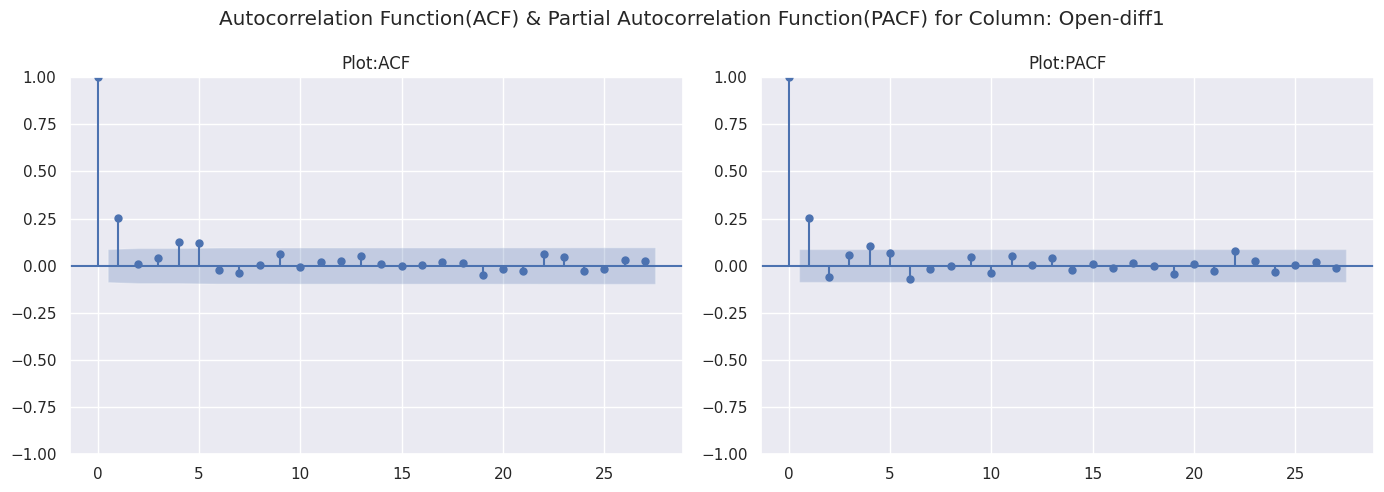

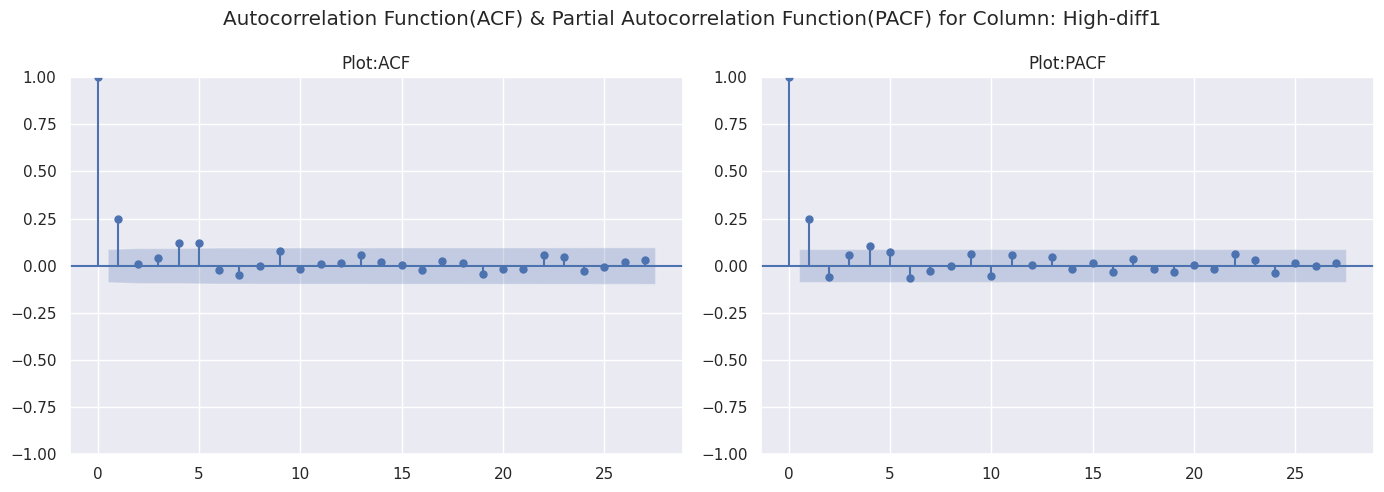

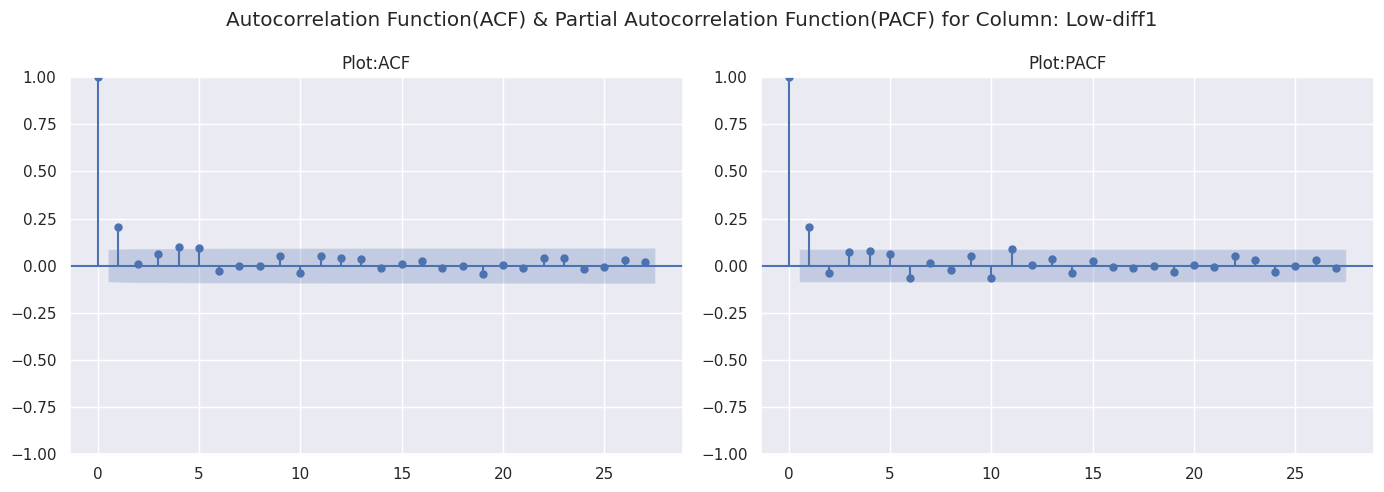

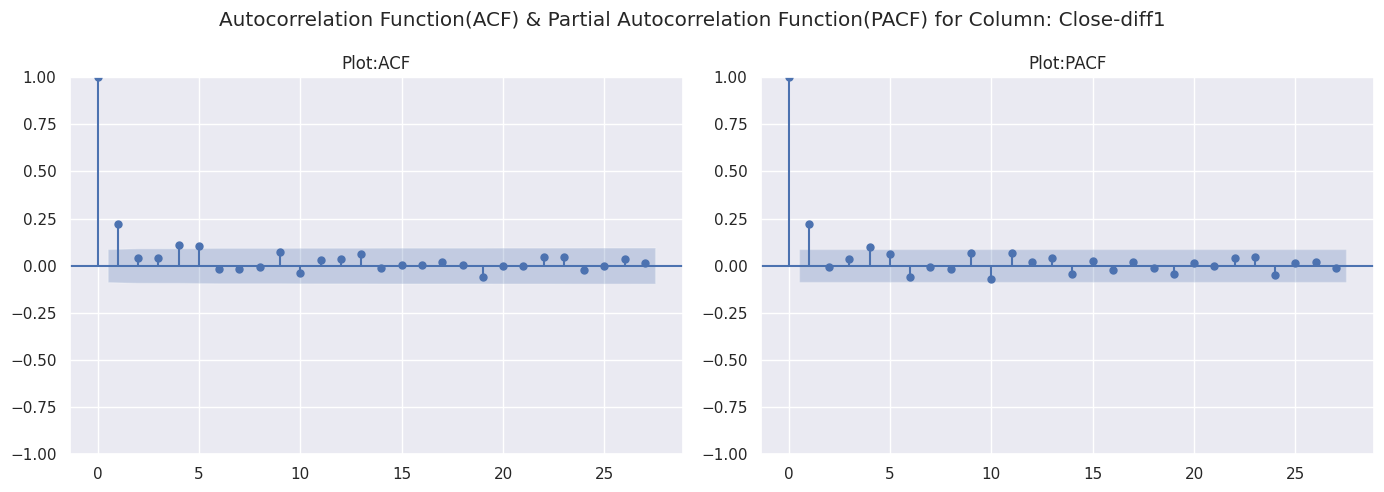

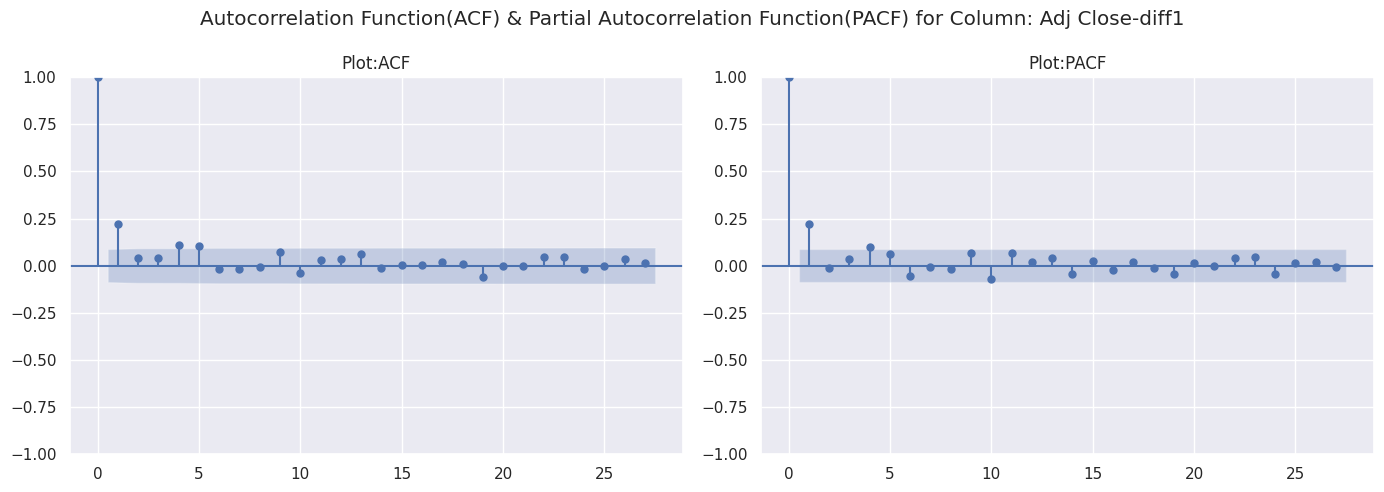

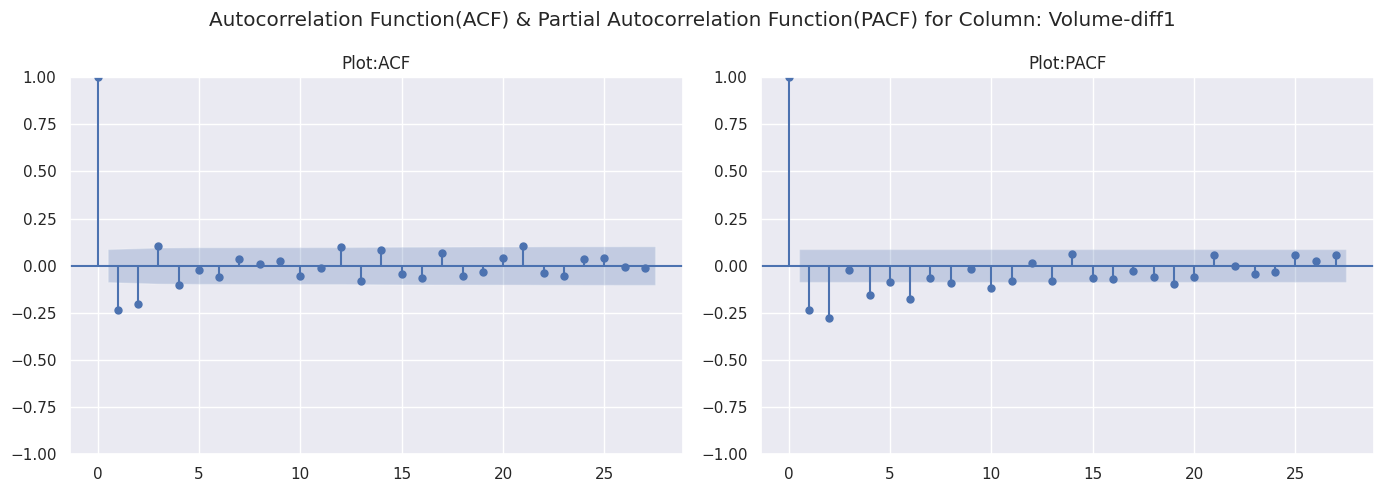

In [ ]:
for col in df_resampled_stationary.columns:
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  plt.suptitle(f"Autocorrelation Function(ACF) & Partial Autocorrelation Function(PACF) for Column: {col}")

  plot_acf(df_resampled_stationary[col].dropna(), ax=axes[0])
  axes[0].set_title("Plot:ACF")

  plot_pacf(df_resampled_stationary[col].dropna(), ax=axes[1])
  axes[1].set_title("Plot:PACF")

  plt.tight_layout()
plt.show()

In [ ]:
AR_Value={"Open":1,"High":1,"Low":1,"Close":1,'Adj Close':1,"Volume":2}

In [ ]:
MA_Value={"Open":1,"High":1,"Low":1,"Close":1,'Adj Close':1,"Volume":4}

In [ ]:
df_resampled.head()

Open        High         Low       Close   Adj Close      Volume
Date                                                                              
2015-01-04  490.612686  503.029511  489.499618  499.764526  496.477966  2568822.00
2015-01-11  503.539038  510.623053  496.999182  505.250684  501.928040  6712015.80
2015-01-18  518.389746  524.147986  511.830115  518.597522  515.187097  4822536.20
2015-01-25  543.718091  557.797058  539.503296  554.878381  551.229370  6210870.80
2015-02-01  589.291748  596.675064  579.966782  588.067398  584.200119  6391698.75

In [ ]:
df_resampled.head(),len(df_resampled)

(                  Open        High         Low       Close   Adj Close      Volume
 Date                                                                              
 2015-01-04  490.612686  503.029511  489.499618  499.764526  496.477966  2568822.00
 2015-01-11  503.539038  510.623053  496.999182  505.250684  501.928040  6712015.80
 2015-01-18  518.389746  524.147986  511.830115  518.597522  515.187097  4822536.20
 2015-01-25  543.718091  557.797058  539.503296  554.878381  551.229370  6210870.80
 2015-02-01  589.291748  596.675064  579.966782  588.067398  584.200119  6391698.75,
 500)

In [ ]:
df_resampled["Open"].rolling(2).mean().head()

Date
2015-01-04           NaN
2015-01-11    497.075862
2015-01-18    510.964392
2015-01-25    531.053919
2015-02-01    566.504919
Freq: W-SUN, Name: Open, dtype: float64

In [ ]:
df_resampled["Open"].head()

Date
2015-01-04    490.612686
2015-01-11    503.539038
2015-01-18    518.389746
2015-01-25    543.718091
2015-02-01    589.291748
Freq: W-SUN, Name: Open, dtype: float64

In [ ]:
def forecast_ma(column,df,MA_window,train_size,forecast_period):
  x_train=df[column].iloc[:train_size]
  x_test=df[column].iloc[train_size:]
  arr_MA=x_train.rolling(MA_window).mean().to_numpy()
  for i in range(len(x_test)+forecast_period):
    forecast_value=arr_MA[-MA_window:].mean()
    arr_MA=np.append(arr_MA,forecast_value)
  forecast_index= pd.date_range(start=x_test.index[-1], periods=forecast_period+1, freq='W')
  df_MA=pd.DataFrame(arr_MA,index=df.index.append(forecast_index[1:]),columns=[column])
  x_train_index=x_train.index[-1]
  x_test_index=x_test.index[-1]
  return  df_MA,x_train_index,  x_test_index, forecast_index[0]

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train for Open is 0.5851348819653447 
 rmse_test for Open is 354.34585578010694
rmse_train for High is 0.5736594632886635 
 rmse_test for High is 357.32166521516734
rmse_train for Low is 0.5592478653949429 
 rmse_test for Low is 348.4966795285889
rmse_train for Close is 0.6051509011909805 
 rmse_test for Close is 352.7357091966218
rmse_train for Adj Close is 0.6014146816854962 
 rmse_test for Adj Close is 352.2434951676943
rmse_train for Volume is 13350117.69184154 
 rmse_test for Volume is 14823989.582434973


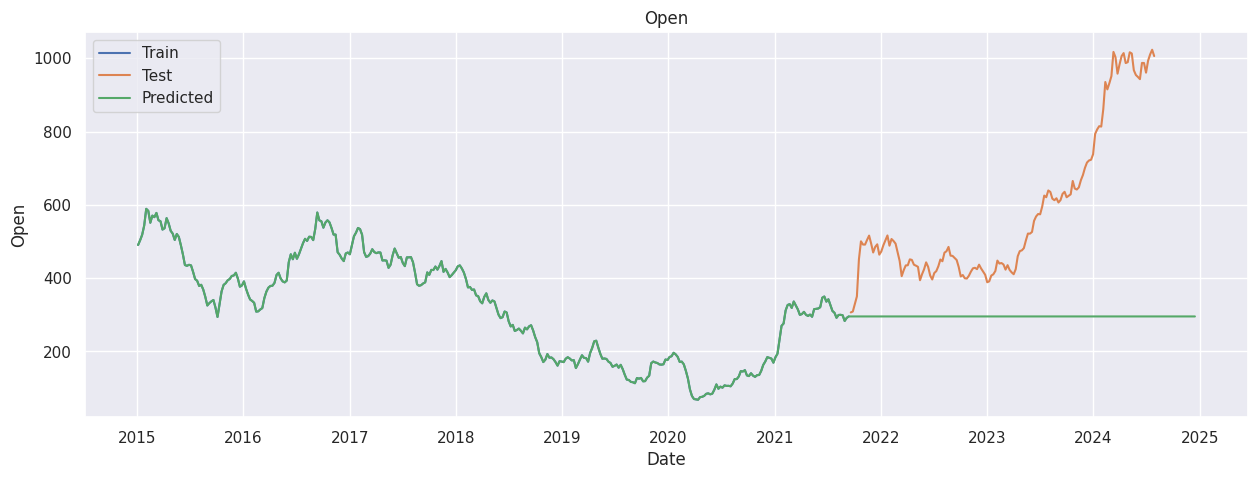

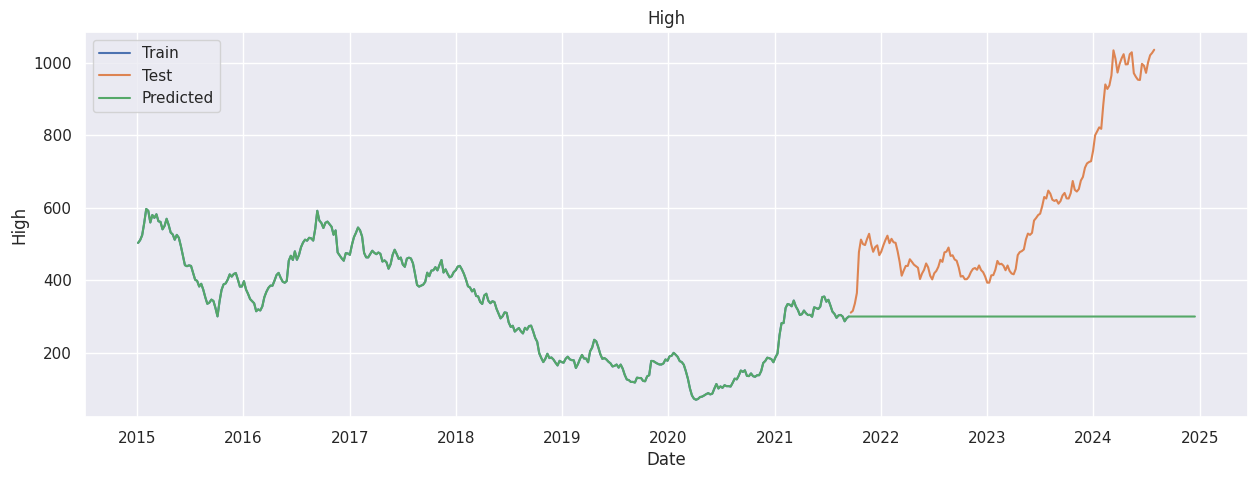

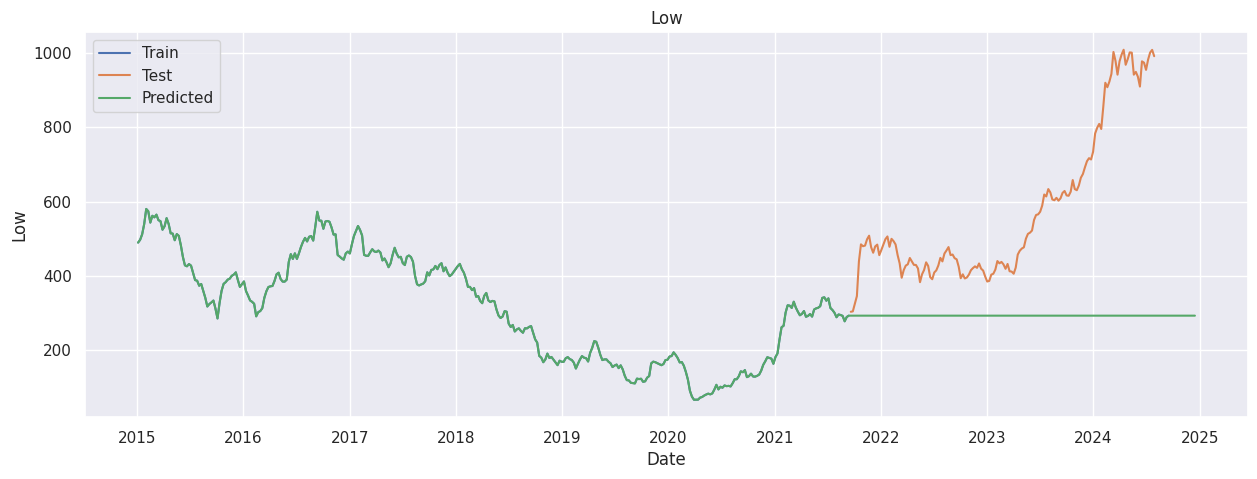

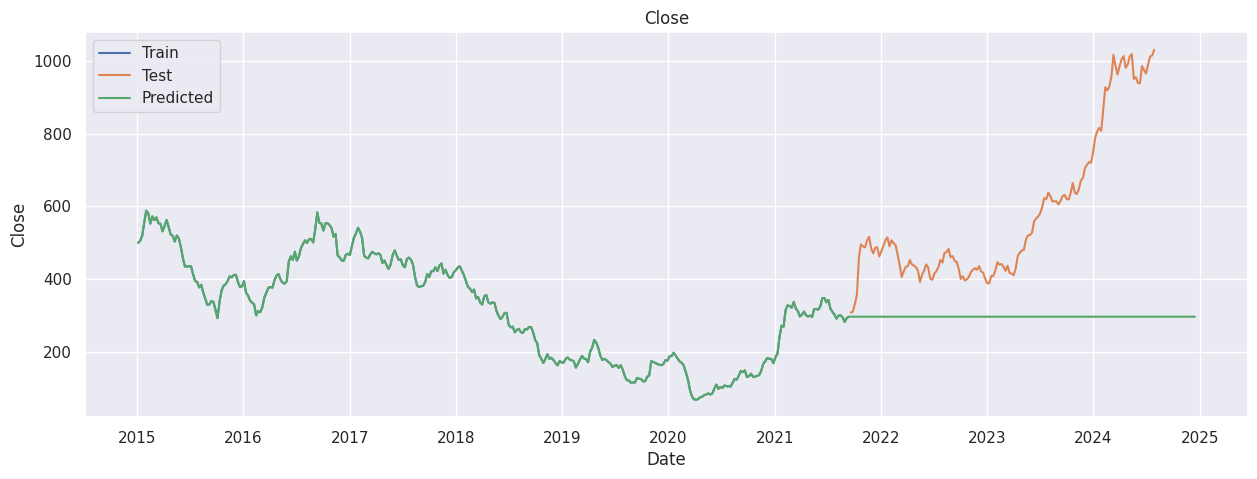

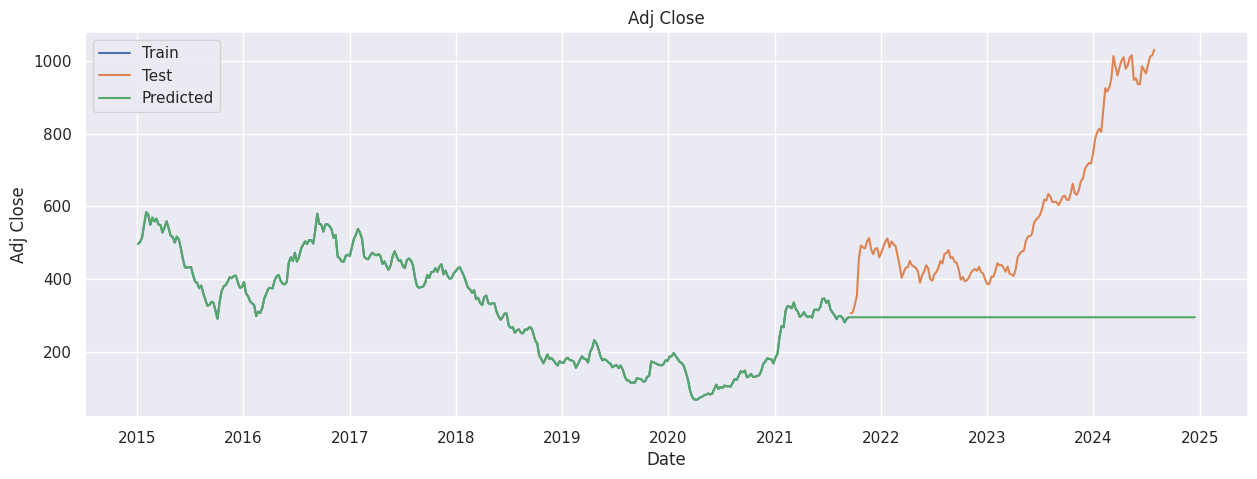

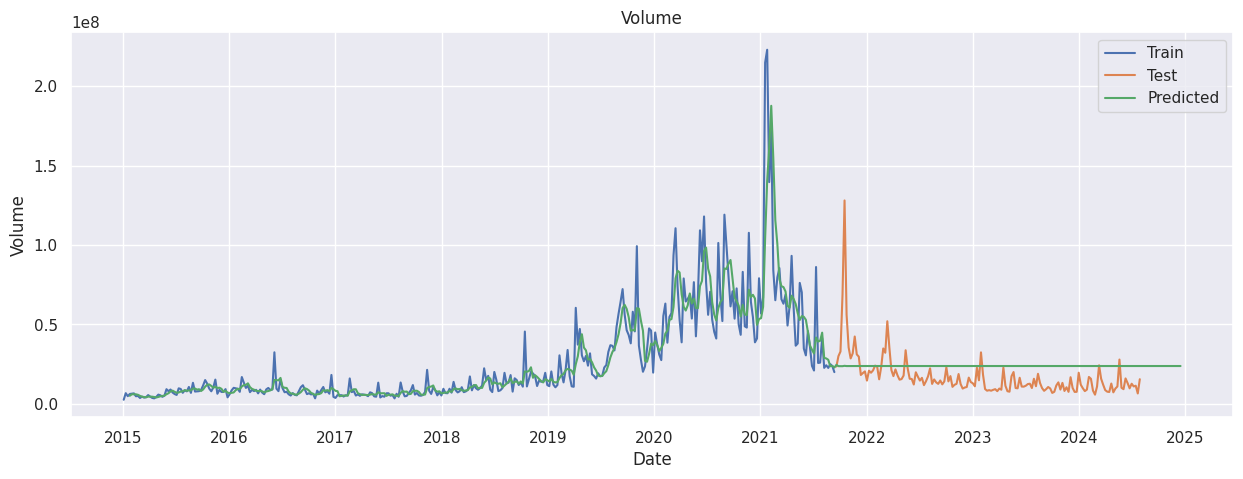

In [ ]:
for col in main_col:
  train_size=int(len(df_resampled)*0.7)
  forecast_period=20
  forecast_df_ma,x_train_ind, x_test_ind,forecast_ind=forecast_ma(column=col,df=df_resampled,MA_window=MA_Value[col],train_size=train_size,forecast_period=forecast_period)
  plt.figure(figsize=(15,5))
  plt.title(f"{col}")
  sns.lineplot(df_resampled[col][:train_size],label="Train")
  sns.lineplot(df_resampled[col][train_size:],label="Test")
  sns.lineplot(forecast_df_ma[col],label="Predicted")
  initial=forecast_df_ma[col][:int(len(df_resampled)*0.7)].dropna().index[0]
  last=df_resampled[col][:int(len(df_resampled)*0.7)].index[-1]+pd.DateOffset(weeks=1)
  rmse_train=np.sqrt(mean_squared_error(df_resampled[col][initial:last],forecast_df_ma[col][initial:last]))
  rmse_test=np.sqrt(mean_squared_error(df_resampled[col][train_size:],forecast_df_ma[col][train_size:-forecast_period]))
  print(f"rmse_train for {col} is {rmse_train} \n rmse_test for {col} is {rmse_test}")

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
train_size=int(0.7*len(df_resampled))
forecast_week=10
column="Open"
lag=AR_Value[column]

In [ ]:
x_train=df_resampled[column].iloc[:train_size]
x_test=df_resampled[column].iloc[train_size:]
model_ar=AutoReg(x_train,lags=lag).fit()
forecast_df= model_ar.forecast(forecast_week+len(x_test))
forecast_df.head(),len(x_train), len(x_test), len(forecast_df)

(2021-09-19    295.191695
 2021-09-26    294.798747
 2021-10-03    294.408636
 2021-10-10    294.021343
 2021-10-17    293.636846
 Freq: W-SUN, dtype: float64,
 350,
 150,
 160)

In [ ]:
len(forecast_df[:-forecast_week])

150

In [ ]:
len(forecast_df[-forecast_week:])

10

In [ ]:
len(x_train)

350

In [ ]:
len(x_test)

150

In [ ]:
def forecast_ar(column,df,lag,train_size,forecast_week):
  x_train=df[column].iloc[:train_size]
  x_test=df[column].iloc[train_size:]
  model_ar=AutoReg(x_train,lags=lag).fit()
  forecast_df= model_ar.forecast(forecast_week+len(x_test))
  x_test_pred=forecast_df[:-forecast_week]
  forecast_ar_df=forecast_df[-forecast_week:]
  return  x_test_pred,forecast_ar_df

In [ ]:
train_size=int(0.7*len(df_resampled))
forecast_period=10
column="Open"

In [ ]:
x_test_pred,forecast_ar=forecast_ar(column=column,df=df_resampled,lag=AR_Value[column],train_size=train_size,forecast_week=forecast_period)

In [ ]:
x_test_pred.head()

2021-09-19    295.191695
2021-09-26    294.798747
2021-10-03    294.408636
2021-10-10    294.021343
2021-10-17    293.636846
Freq: W-SUN, dtype: float64

In [ ]:
forecast_ar.head()

2024-08-04    259.124008
2024-08-11    258.991508
2024-08-18    258.859965
2024-08-25    258.729371
2024-09-01    258.599720
Freq: W-SUN, dtype: float64

In [ ]:
df_resampled[column][train_size:].head()

Date
2021-09-19    306.550000
2021-09-26    308.990002
2021-10-03    329.209998
2021-10-10    350.250000
2021-10-17    451.512497
Freq: W-SUN, Name: Open, dtype: float64

In [ ]:
rmse_test=np.sqrt(mean_squared_error(df_resampled[column][train_size:],x_test_pred))
rmse_test

376.55363902875166

<Axes: xlabel='Date', ylabel='Open'>

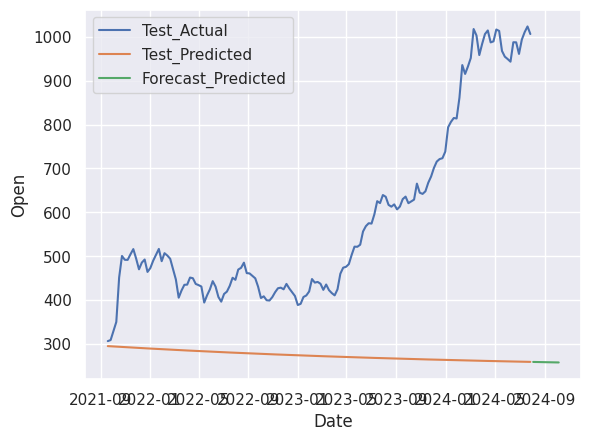

In [ ]:
  sns.lineplot(df_resampled[column][train_size:],label="Test_Actual")
  sns.lineplot(x_test_pred,label="Test_Predicted")
  sns.lineplot(forecast_ar,label="Forecast_Predicted")

rmse_test for Open is 376.55363902875166
rmse_test for High is 379.5635339878611
rmse_test for Low is 371.18007028620826
rmse_test for Close is 375.3665568895381
rmse_test for Adj Close is 374.7144105140395
rmse_test for Volume is 16917655.9856441


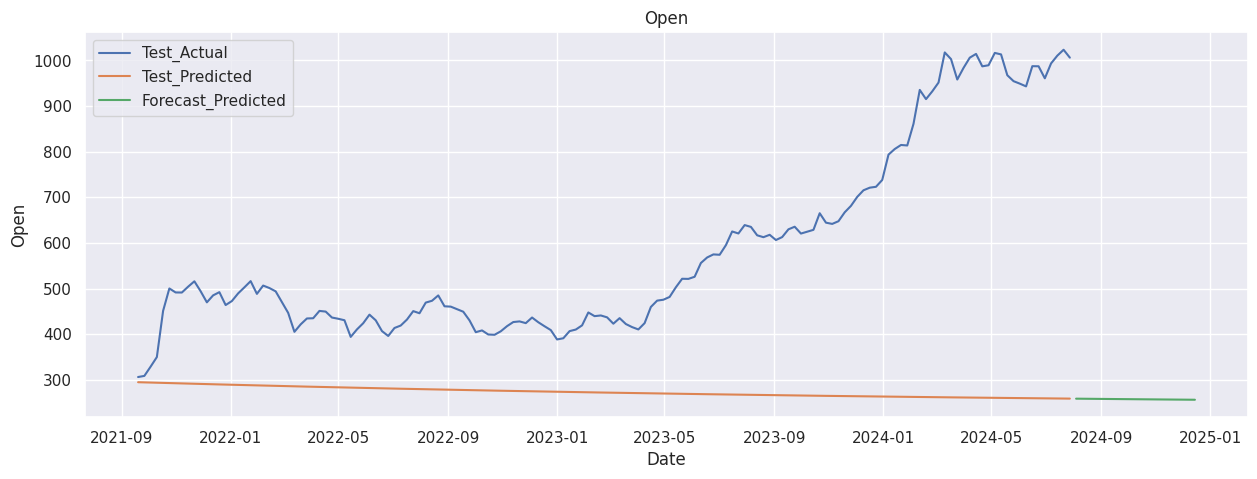

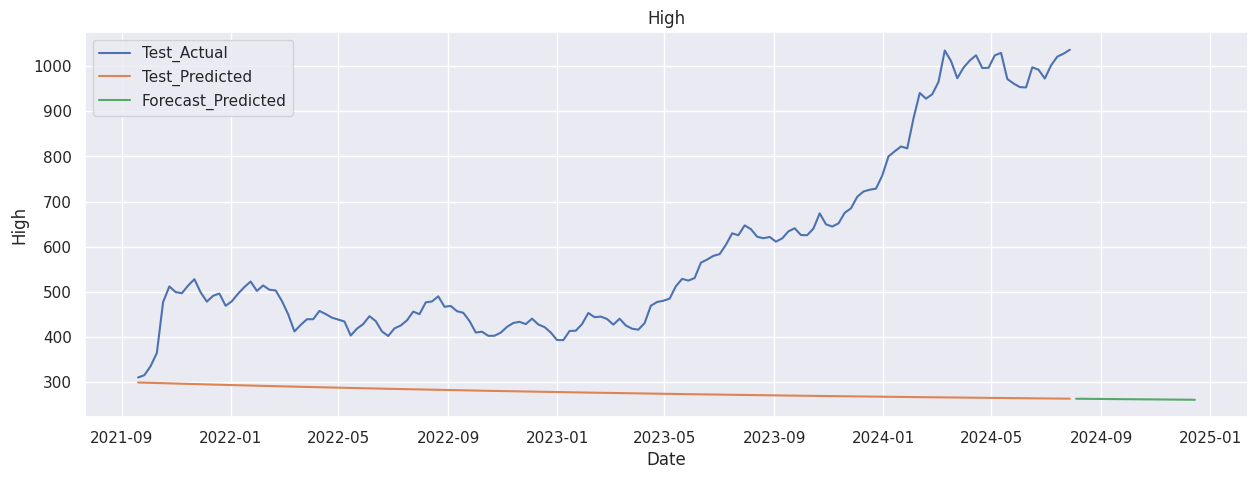

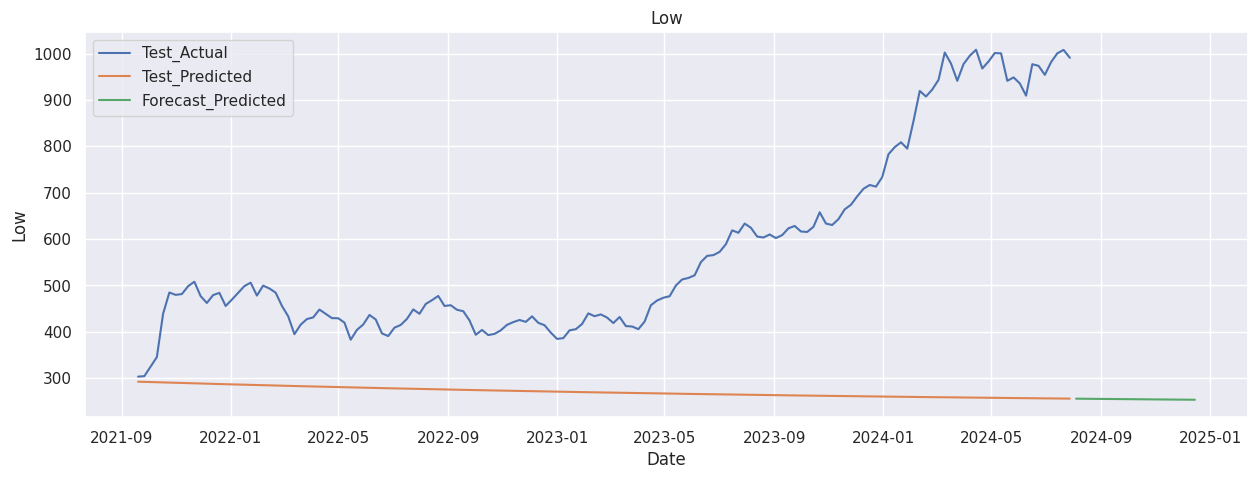

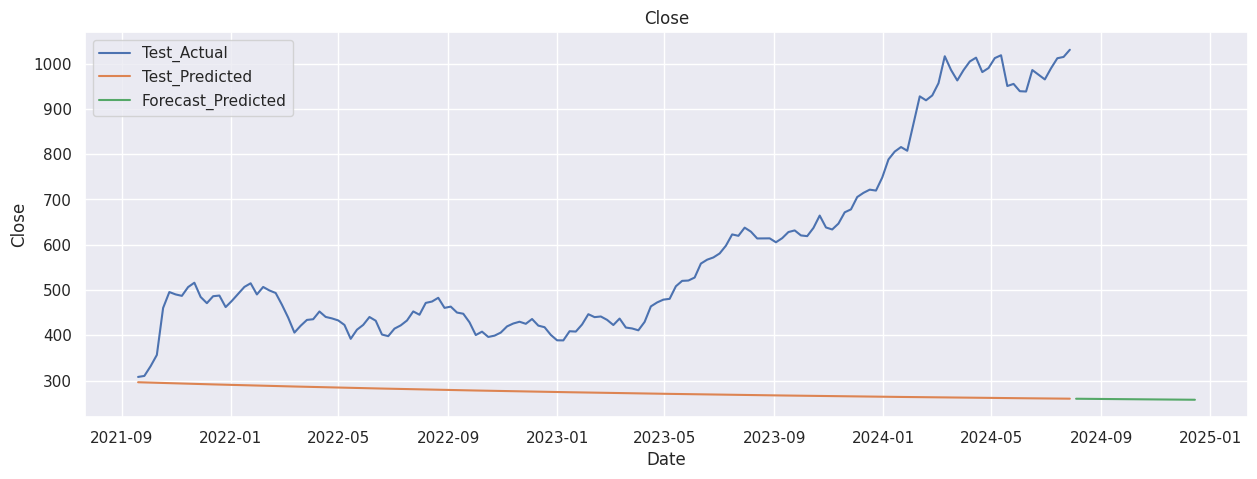

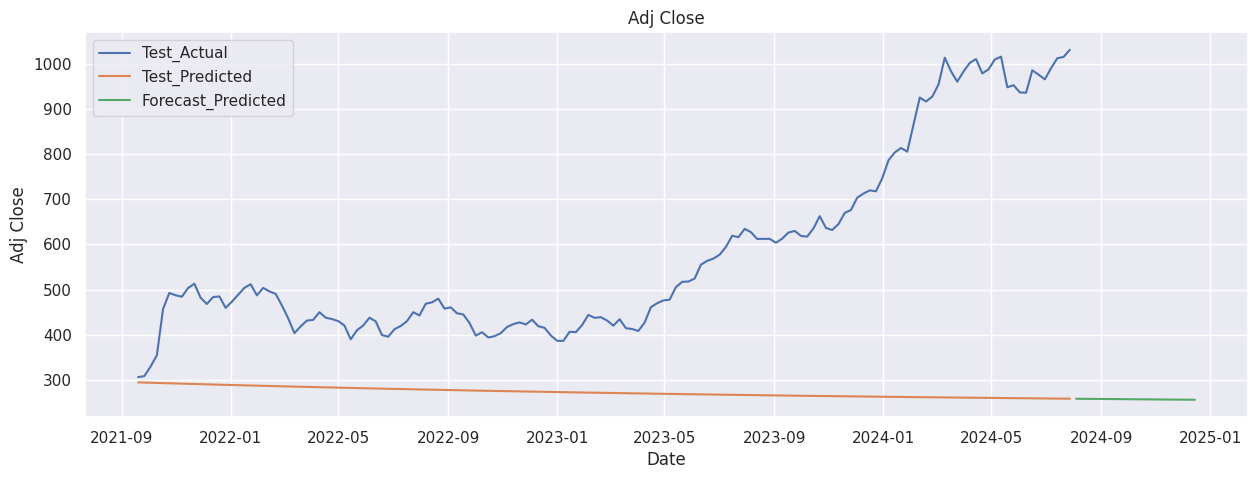

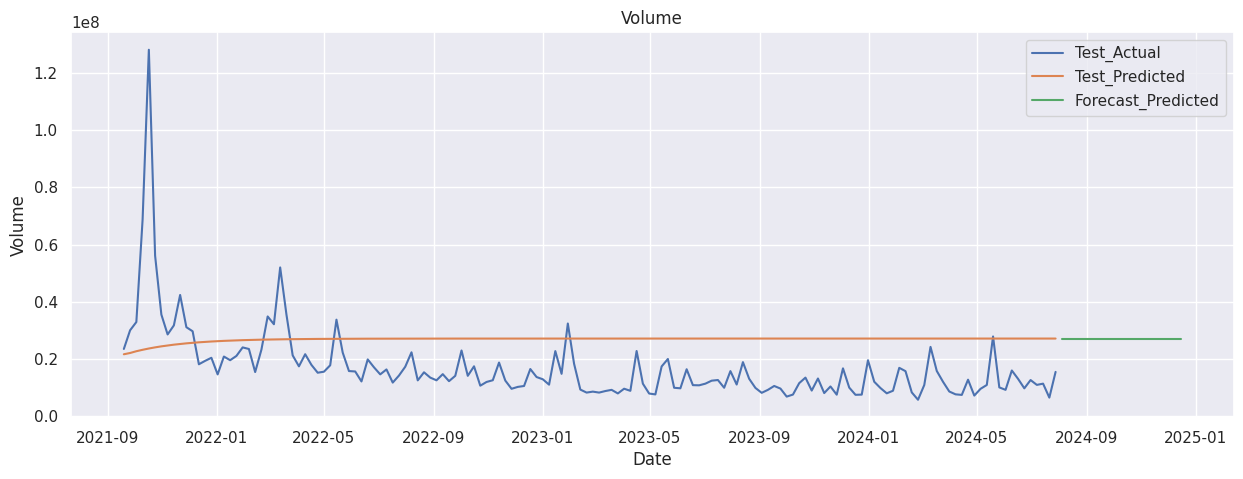

In [ ]:
for col in main_col:
  train_size=int(len(df_resampled)*0.7)
  forecast_period=20
  x_test_pred,forecast_ar_df=forecast_ar(column=col,df=df_resampled,lag=AR_Value[col],train_size=train_size,forecast_week=forecast_period)
  plt.figure(figsize=(15,5))
  plt.title(f"{col}")
  sns.lineplot(df_resampled[col][train_size:],label="Test_Actual")
  sns.lineplot(x_test_pred,label="Test_Predicted")
  sns.lineplot(forecast_ar_df,label="Forecast_Predicted")
  rmse_test=np.sqrt(mean_squared_error(df_resampled[col][train_size:],x_test_pred))
  print(f"rmse_test for {col} is {rmse_test}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
p=AR_Value["Open"]
d=stationary_diff_df["Open"][0]
q=MA_Value["Open"]

In [ ]:
arima_model=ARIMA(x_train,order=(p,d,q))
model_arima=arima_model.fit()

In [109]:
def forecast_arima(column,df,train_size,forecast_week):
  x_train=df[column].iloc[:train_size]
  x_test=df[column].iloc[train_size:]
  model_ar=AutoReg(x_train,lags=lag).fit()
  forecast_df= model_ar.forecast(forecast_week+len(x_test))
  x_test_pred=forecast_df[:-forecast_week]
  forecast_arima_df=forecast_df[-forecast_week:]
  return  x_test_pred,forecast_arima_df

In [110]:
x_test_pred,forecast_arima_df=forecast_arima(column="Open",df=df_resampled,train_size=int(len(df_resampled)*0.7),forecast_week=10)

In [111]:
len(x_test_pred),len(forecast_arima_df)

(150, 10)

rmse_test for Open is 376.55363902875166
rmse_test for High is 379.5635339878611
rmse_test for Low is 371.18007028620826
rmse_test for Close is 375.3665568895381
rmse_test for Adj Close is 374.7144105140395
rmse_test for Volume is 16791928.882265728


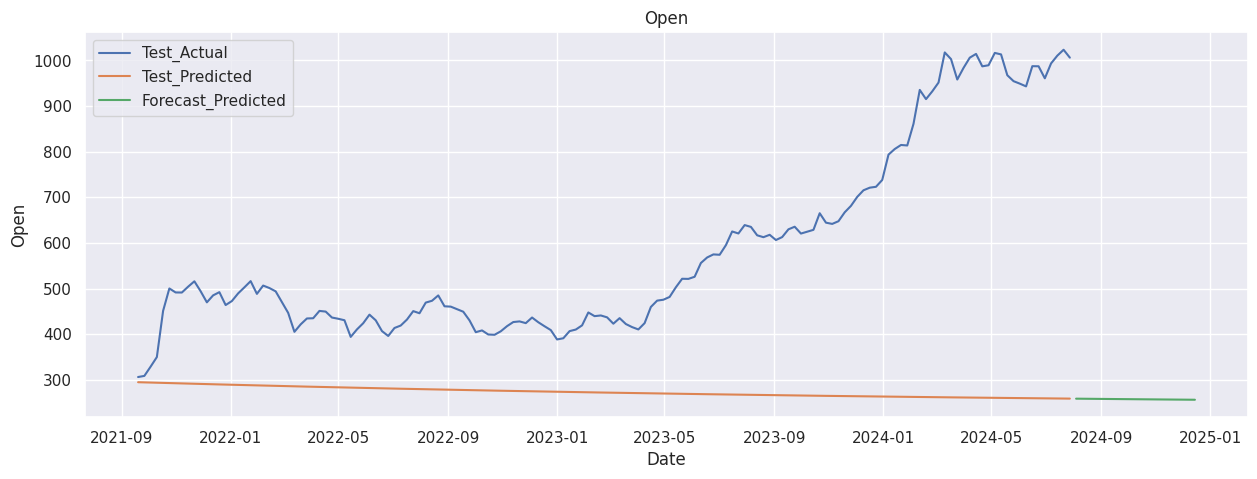

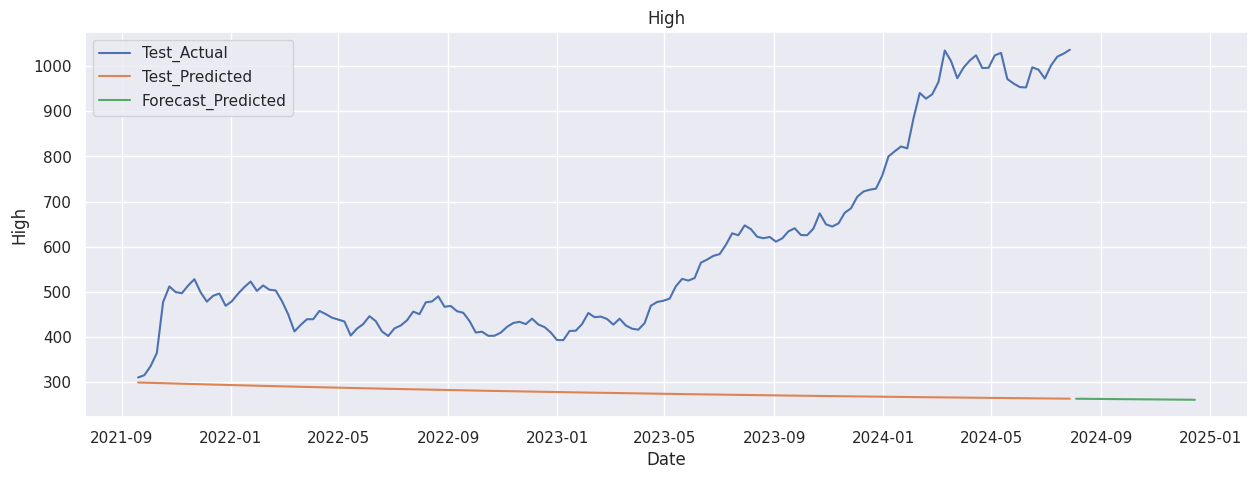

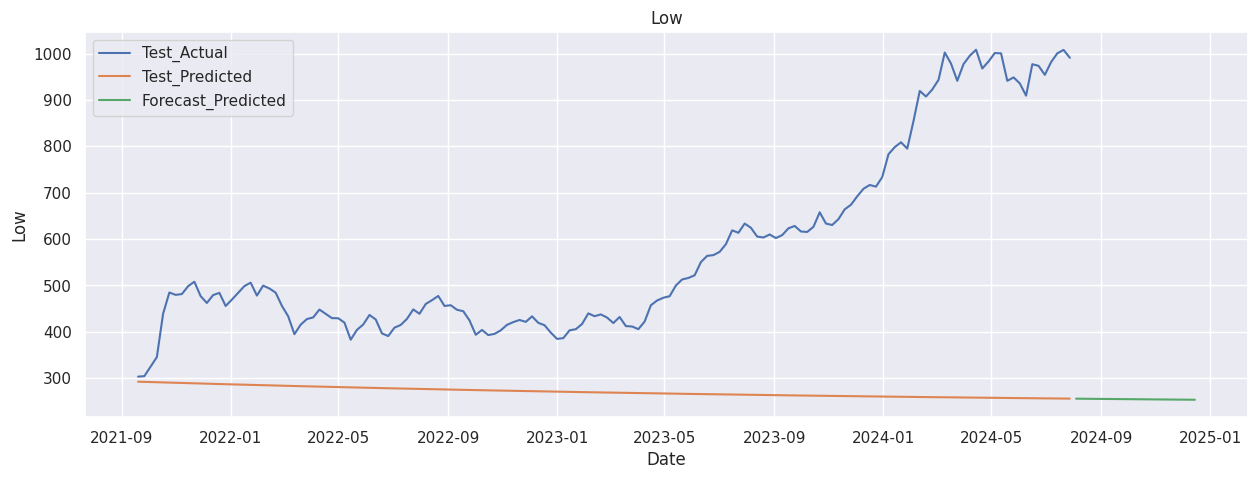

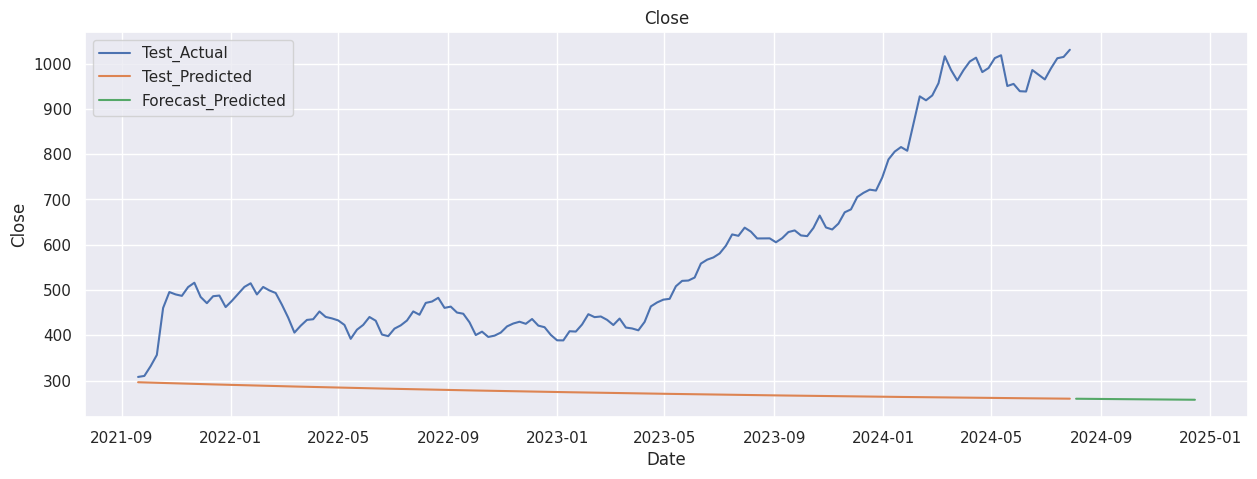

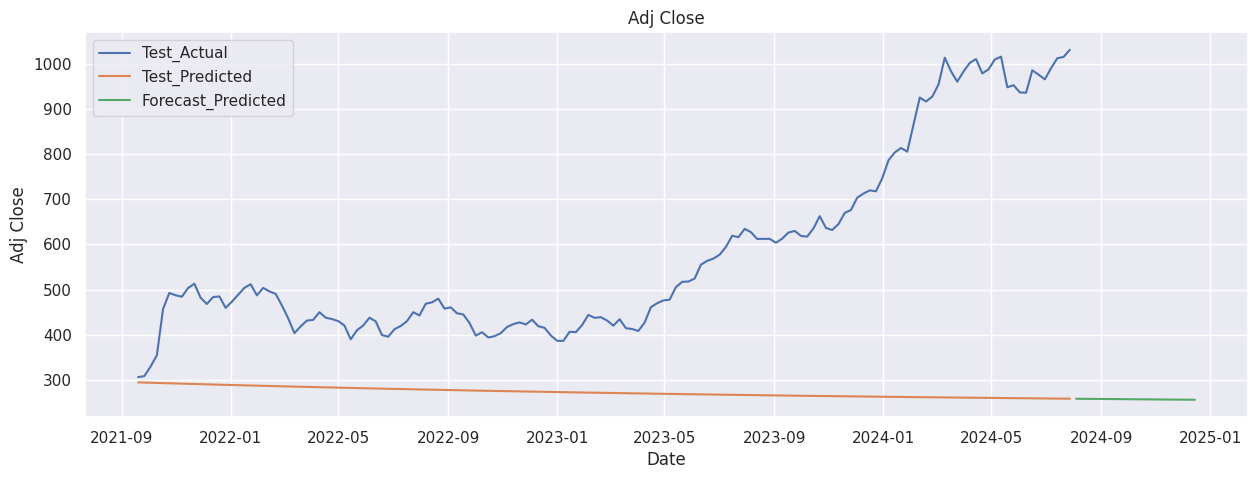

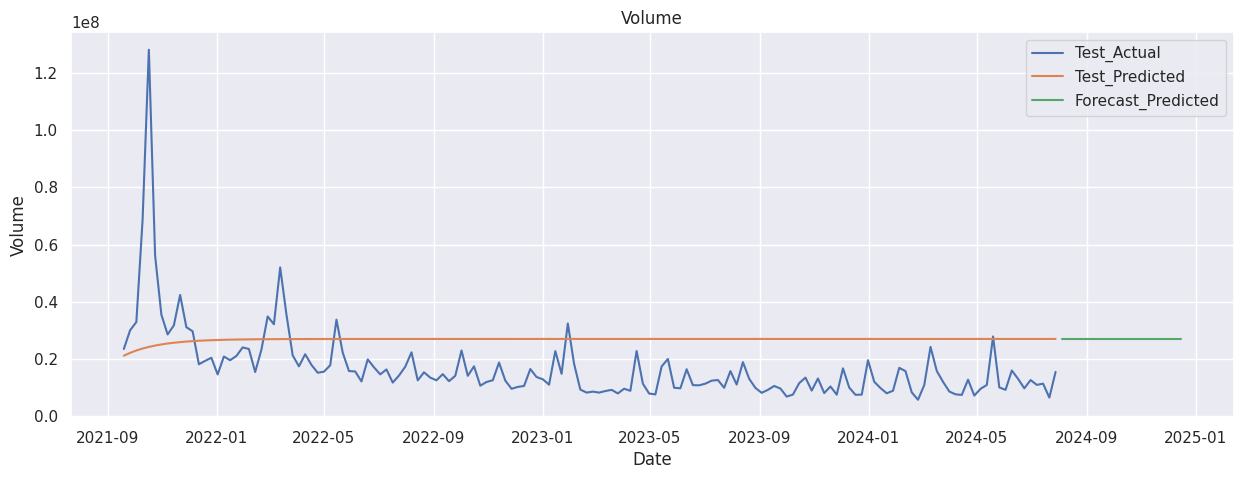

In [112]:
for col in main_col:
  train_size=int(len(df_resampled)*0.7)
  forecast_period=20
  x_test_pred,forecast_arima_df=forecast_arima(column=col,df=df_resampled,train_size=train_size,forecast_week=forecast_period)
  plt.figure(figsize=(15,5))
  plt.title(f"{col}")
  sns.lineplot(df_resampled[col][train_size:],label="Test_Actual")
  sns.lineplot(x_test_pred,label="Test_Predicted")
  sns.lineplot(forecast_arima_df,label="Forecast_Predicted")
  rmse_test=np.sqrt(mean_squared_error(df_resampled[col][train_size:],x_test_pred))
  print(f"rmse_test for {col} is {rmse_test}")

In [ ]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Open'])

In [ ]:
sm.stats.durbin_watson(df['Close'])

In [ ]:
sm.stats.durbin_watson(df['Volume'])

In [ ]:
df.describe()

In [ ]:
df.nunique()

In [ ]:
df['Open'].plot()

In [ ]:
df['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df.head()

In [ ]:
df_final_model = df.set_index('Time_Stamp')
df_final_model.head()

In [ ]:
df_final_model.info()

In [ ]:
# Decomposition to check dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_final_model['Open'], period=12)
decompose.plot()
plt.show()

# Plot the boxplot of the 'Open' variable with respect to the different years

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.year, y = df_final_model['Open'])
plt.grid();

In [ ]:
df_final_model.index.year

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.month_name(), y = df_final_model['Open'])
plt.grid();

# Augmented Dickey Fuller Test - To check time series data is stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df_final_model['Open'])

In [ ]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or not")
    labels = ['ADF Stats', 'P-Values','#Lags', 'No of observation']
    for i, j in zip(result, labels):
        print(j + " :-> " + str(i))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothes and my time series is Non-Stationary")

In [ ]:
check_adftest(df_final_model['Open'])

In [ ]:
df_final_model['1st Diff'] = df_final_model['Open'] - df_final_model['Open'].shift(1)

In [ ]:
df_final_model

In [ ]:
check_adftest(df_final_model['1st Diff'].dropna())

In [ ]:
# split the data into train and test
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start Date of Stock  :", start_date)
print("End Data of the Stock :", end_date)

In [ ]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2022-02-02')]
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2022-02-02')]

In [ ]:
train.shape, test.shape

In [ ]:
train_final = train[['1st Diff']]
test_final = test[['1st Diff']]

In [ ]:
train_final

In [ ]:
test_final

In [ ]:
check_adftest(train_final['1st Diff'].dropna())

In [ ]:
check_adftest(test_final['1st Diff'].dropna())

# Building Time Series Forecasting

## Facebook Prophet Model

In [ ]:
!pip install prophet

In [ ]:
import prophet
dir(prophet)

In [ ]:
df

In [ ]:
df = df.iloc[:,:-1]
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = df.rename(columns={'Date':'ds', 'Open':'y'})
df_prophet

In [ ]:
df_prophet['ds'].max()

In [ ]:
m = Prophet()
model = m.fit(df_prophet)

In [ ]:
model.seasonalities

In [ ]:
# Last date - 2024-07-25
future_global = model.make_future_dataframe(periods=100, freq='D')
future_global.tail()

In [ ]:
#2024-12-07
len(df_prophet)

In [ ]:
df_prophet.tail()

In [ ]:
future_global.tail(20)

In [ ]:
len(future_global)

In [ ]:
2510-2410

In [ ]:
prediction = model.predict(future_global)
prediction

In [ ]:
prediction.columns

In [ ]:
prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(100)

In [ ]:
model.plot(prediction)
plt.show()

In [ ]:
# ARIMA = AR = Partial autocorrelation (P)
# I - integrated (Difference) = D = 1
# MA - Auto correlation (Q)
# PARAMETER = P D Q


In [ ]:
model.plot_components(prediction)
plt.show()